# Weather, Venues and Cities in Canada (March 14 2020)

In [1]:
#Import all necessary libraries that would be needed
!pip install folium
!pip install geopy
import folium
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import json
import requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 112kB 2.7MB/s eta 0:00:01
Libraries imported.


In [2]:
#Look at where my files are being picked up from
import os
os.getcwd()

'/resources/labs/DP0701EN'

## A) Weather Data

In [3]:
#I uploaded the csv files to the directory
df1_T=pd.read_csv('2018.csv')
df2_T=pd.read_csv('2017.csv')
df3_T=pd.read_csv('2016.csv')
df4_T=pd.read_csv('2015.csv')
df5_T=pd.read_csv('2014.csv')
df1_V=pd.read_csv('2018_VAN.csv')
df2_V=pd.read_csv('2017_VAN.csv')
df3_V=pd.read_csv('2016_VAN.csv')
df4_V=pd.read_csv('2015_VAN.csv')
df5_V=pd.read_csv('2014_VAN.csv')
df1_C=pd.read_csv('2018_CAL.csv')
df2_C=pd.read_csv('2017_CAL.csv')
df3_C=pd.read_csv('2016_CAL.csv')
df4_C=pd.read_csv('2015_CAL.csv')
df5_C=pd.read_csv('2014_CAL.csv')
df1_CH=pd.read_csv('2018_CH2.csv')
df2_CH=pd.read_csv('2017_CH2.csv')
df3_CH=pd.read_csv('2016_CH2.csv')
df4_CH=pd.read_csv('2015_CH2.csv')
df5_CH=pd.read_csv('2014_CH2.csv')
df1_FRED=pd.read_csv('2018_FRED2.csv')
df2_FRED=pd.read_csv('2017_FRED2.csv')
df3_FRED=pd.read_csv('2016_FRED2.csv')
df4_FRED=pd.read_csv('2015_FRED2.csv')
df5_FRED=pd.read_csv('2014_FRED2.csv')
df1_H=pd.read_csv('2018_Hali.csv')
df2_H=pd.read_csv('2017_Hali.csv')
df3_H=pd.read_csv('2016_Hali.csv')
df4_H=pd.read_csv('2015_Hali.csv')
df5_H=pd.read_csv('2014_Hali.csv')
df1_M=pd.read_csv('2018_MON2.csv')
df2_M=pd.read_csv('2017_MON2.csv')
df3_M=pd.read_csv('2016_MON2.csv')
df4_M=pd.read_csv('2015_MON2.csv')
df5_M=pd.read_csv('2014_MON2.csv')
df1_SAS=pd.read_csv('2018_SAS.csv')
df2_SAS=pd.read_csv('2017_SAS.csv')
df3_SAS=pd.read_csv('2016_SAS.csv')
df4_SAS=pd.read_csv('2015_SAS.csv')
df5_SAS=pd.read_csv('2014_SAS.csv')
df1_SJ=pd.read_csv('2018_SJ.csv')
df2_SJ=pd.read_csv('2017_SJ.csv')
df3_SJ=pd.read_csv('2016_SJ.csv')
df4_SJ=pd.read_csv('2015_SJ.csv')
df5_SJ=pd.read_csv('2014_SJ.csv')
df1_WINN=pd.read_csv('2018_WINN.csv')
df2_WINN=pd.read_csv('2017_WINN.csv')
df3_WINN=pd.read_csv('2016_WINN.csv')
df4_WINN=pd.read_csv('2015_WINN.csv')
df5_WINN=pd.read_csv('2014_WINN.csv')

In [4]:
#I merged the csv files
df_TORONTO = pd.concat([df1_T, df2_T, df3_T, df4_T, df5_T], ignore_index=True)
df_VANCOUVER = pd.concat([df1_V, df2_V, df3_V, df4_V, df5_V], ignore_index=True)
df_CALGARY = pd.concat([df1_C, df2_C, df3_C, df4_C, df5_C], ignore_index=True)
df_CHARL = pd.concat([df1_CH, df2_CH, df3_CH, df4_CH, df5_CH], ignore_index=True)
df_FRED = pd.concat([df1_FRED, df2_FRED, df3_FRED, df4_FRED, df5_FRED], ignore_index=True)
df_HALIFAX = pd.concat([df1_H, df2_H, df3_H, df4_H, df5_H], ignore_index=True)
df_MON = pd.concat([df1_M, df2_M, df3_M, df4_M, df5_M], ignore_index=True)
df_SAS = pd.concat([df1_SAS, df2_SAS, df3_SAS, df4_SAS, df5_SAS], ignore_index=True)
df_SJ = pd.concat([df1_SJ, df2_SJ, df3_SJ, df4_SJ, df5_SJ], ignore_index=True)
df_WINN = pd.concat([df1_WINN, df2_WINN, df3_WINN, df4_WINN, df5_WINN], ignore_index=True)

In [5]:
df_TORONTO.shape

(1826, 31)

In [6]:
df_VANCOUVER.shape

(1826, 31)

In [7]:
df_CALGARY.shape

(1826, 31)

In [8]:
df_CHARL.shape

(1826, 31)

In [9]:
df_FRED.shape

(1826, 31)

In [10]:
df_HALIFAX.shape

(1826, 31)

In [11]:
df_MON.shape

(1826, 31)

In [12]:
df_SAS.shape

(1826, 31)

In [13]:
df_SJ.shape

(1826, 31)

In [14]:
df_WINN.shape

(1826, 31)

In [15]:
# I took a look at the columns to see which ones i Wanted to keep and use for analysis against trends later on
df_TORONTO.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [16]:
# The data is from one weather station and hence, Station name and Climate ID can be removed, kept long and lat in case it is needed later on
# All other columns removed except for Snow on Ground Mean Temperature and Total Rain and Total Snow and Total Precip as I am not sure which one I would be interested in
df_TORONTO_1 = df_TORONTO[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_TORONTO_1.head()

Longitude (x)  Latitude (y)   Date/Time  Year  Month  Day  Mean Temp (°C)  \
0          -79.4         43.63  2018-01-01  2018      1    1           -13.1   
1          -79.4         43.63  2018-01-02  2018      1    2            -9.2   
2          -79.4         43.63  2018-01-03  2018      1    3            -7.6   
3          -79.4         43.63  2018-01-04  2018      1    4           -13.4   
4          -79.4         43.63  2018-01-05  2018      1    5           -17.8   

   Total Precip (mm)  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [17]:
# Do the same for all others
df_VANCOUVER_1 = df_VANCOUVER[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_CALGARY_1 = df_CALGARY[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_CHARL_1 = df_CHARL[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_FRED_1 = df_FRED[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_HALIFAX_1 = df_HALIFAX[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_MON_1 = df_MON[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_SAS_1 = df_SAS[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_SJ_1 = df_SJ[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]
df_WINN_1 = df_WINN[['Longitude (x)', 'Latitude (y)','Date/Time','Year','Month','Day','Mean Temp (°C)','Total Precip (mm)']]

In [18]:
# The first aspect is to look at missing values, how many NaN are there in each column?
df_TORONTO_1.isnull().sum()

Longitude (x)          0
Latitude (y)           0
Date/Time              0
Year                   0
Month                  0
Day                    0
Mean Temp (°C)       127
Total Precip (mm)    133
dtype: int64

In [19]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_TORONTO_2 = df_TORONTO_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_TORONTO_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_TORONTO_2.isnull().sum()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [20]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_VANCOUVER_2 = df_VANCOUVER_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_VANCOUVER_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_VANCOUVER_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [21]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_CALGARY_2 = df_CALGARY_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_CALGARY_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_CALGARY_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [22]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_CHARL_2 = df_CHARL_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_CHARL_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_CHARL_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [23]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_FRED_2 = df_FRED_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_FRED_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_FRED_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [24]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_HALIFAX_2 = df_HALIFAX_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_HALIFAX_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_HALIFAX_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [25]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_MON_2 = df_MON_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_MON_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_MON_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [26]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_SAS_2 = df_SAS_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_SAS_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_SAS_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [27]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_SJ_2 = df_SJ_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_SJ_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_SJ_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

In [28]:
# Based on the above, if both Mean Temp and Total Precip are missing, then the row is dropped 
df_WINN_2 = df_WINN_1.dropna(how='any', subset=['Mean Temp (°C)' and 'Total Precip (mm)'])
# Replace missing Mean Temp with the value before
df_WINN_2['Mean Temp (°C)'].fillna(method='ffill',inplace=True)
df_WINN_2.isnull().sum()

Longitude (x)        0
Latitude (y)         0
Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (°C)       0
Total Precip (mm)    0
dtype: int64

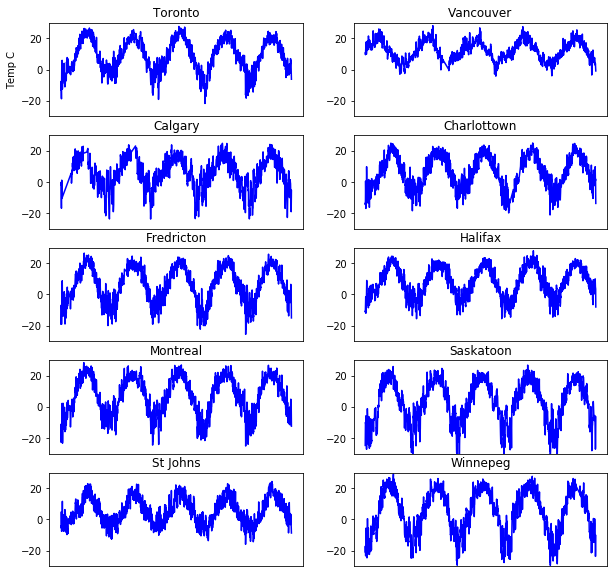

In [29]:
# Let us quickly explore how the precipitation data and weather data look like for all
# Temperature
import matplotlib.pyplot as plt
fig=plt.figure()

ax0 = fig.add_subplot(5, 2, 1)
ax1 = fig.add_subplot(5, 2, 2) 
ax2 = fig.add_subplot(5, 2, 3) 
ax3 = fig.add_subplot(5, 2, 4) 
ax4 = fig.add_subplot(5,2,5)
ax5 = fig.add_subplot (5,2,6)
ax6 = fig.add_subplot (5,2,7)
ax7 = fig.add_subplot (5,2,8)
ax8 = fig.add_subplot (5,2,9)
ax9 = fig.add_subplot (5,2,10)

# Subplot 1: Box plot
df_TORONTO_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax0) # add to subplot 1
ax0.set_title('Toronto')
ax0.set_ylabel('Temp C')
ax0.set_ylim(-30,30)
ax0.axes.get_xaxis().set_visible(False)

# Subplot 2: Line plot
df_VANCOUVER_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax1) # add to subplot 2
ax1.set_title ('Vancouver')
ax1.set_ylim(-30,30)
ax1.axes.get_xaxis().set_visible(False)

# Subplot 3: Line plot
df_CALGARY_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax2) # add to subplot 2
ax2.set_title ('Calgary')
ax2.set_ylim(-30,30)
ax2.axes.get_xaxis().set_visible(False)

# Subplot 4: Line plot
df_CHARL_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax3) # add to subplot 2
ax3.set_title ('Charlottown')
ax3.set_ylim(-30,30)
ax3.axes.get_xaxis().set_visible(False)

# Subplot 5: Line plot
df_FRED_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax4) # add to subplot 2
ax4.set_title ('Fredricton')
ax4.set_ylim(-30,30)
ax4.axes.get_xaxis().set_visible(False)

# Subplot 6: Line plot
df_HALIFAX_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax5) # add to subplot 2
ax5.set_title ('Halifax')
ax5.set_ylim(-30,30)
ax5.axes.get_xaxis().set_visible(False)

# Subplot 7: Line plot
df_MON_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax6) # add to subplot 2
ax6.set_title ('Montreal')
ax6.set_ylim(-30,30)
ax6.axes.get_xaxis().set_visible(False)

# Subplot 8: Line plot
df_SAS_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax7) # add to subplot 2
ax7.set_title ('Saskatoon')
ax7.set_ylim(-30,30)
ax7.axes.get_xaxis().set_visible(False)

# Subplot 9: Line plot
df_SJ_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax8) # add to subplot 2
ax8.set_title ('St Johns')
ax8.set_ylim(-30,30)
ax8.axes.get_xaxis().set_visible(False)

# Subplot 10: Line plot
df_WINN_2['Mean Temp (°C)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax9) # add to subplot 2
ax9.set_title ('Winnepeg')
ax9.set_ylim(-30,30)
ax9.axes.get_xaxis().set_visible(False)

plt.show()

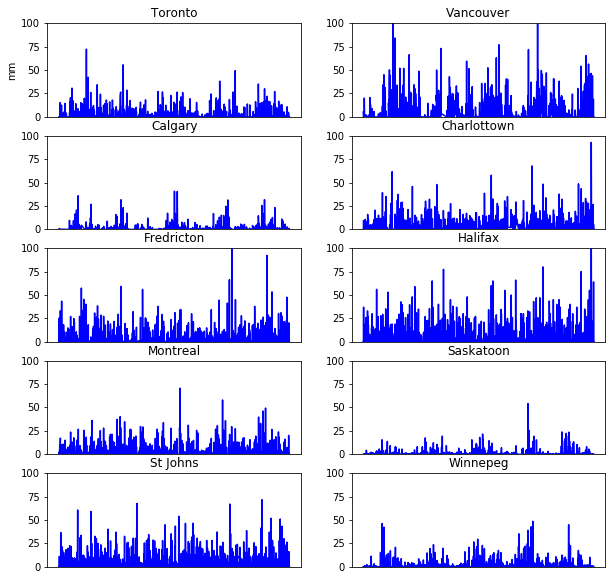

In [30]:
# Let us quickly explore how the precipitation data and weather data look like for  all
# Precipitation

import matplotlib.pyplot as plt
fig=plt.figure()

ax0 = fig.add_subplot(5, 2, 1)
ax1 = fig.add_subplot(5, 2, 2) 
ax2 = fig.add_subplot(5, 2, 3) 
ax3 = fig.add_subplot(5, 2, 4) 
ax4 = fig.add_subplot(5,2,5)
ax5 = fig.add_subplot (5,2,6)
ax6 = fig.add_subplot (5,2,7)
ax7 = fig.add_subplot (5,2,8)
ax8 = fig.add_subplot (5,2,9)
ax9 = fig.add_subplot (5,2,10)

# Subplot 1
df_TORONTO_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax0) # add to subplot 1
ax0.set_title('Toronto')
ax0.set_ylabel('mm')
ax0.set_ylim(0,100)
ax0.axes.get_xaxis().set_visible(False)

# Subplot 2: Line plot
df_VANCOUVER_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax1) # add to subplot 2
ax1.set_title ('Vancouver')
ax1.set_ylim(0,100)
ax1.axes.get_xaxis().set_visible(False)

# Subplot 3: Line plot
df_CALGARY_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax2) # add to subplot 2
ax2.set_title ('Calgary')
ax2.set_ylim(0,100)
ax2.axes.get_xaxis().set_visible(False)

# Subplot 9: Line plot
df_CHARL_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax3) # add to subplot 2
ax3.set_title ('Charlottown')
ax3.set_ylim(0,100)
ax3.axes.get_xaxis().set_visible(False)

# Subplot 10: Line plot
df_FRED_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax4) # add to subplot 2
ax4.set_title ('Fredricton')
ax4.set_ylim(0,100)
ax4.axes.get_xaxis().set_visible(False)

# Subplot 4: Line plot
df_HALIFAX_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax5) # add to subplot 2
ax5.set_title ('Halifax')
ax5.set_ylim(0,100)
ax5.axes.get_xaxis().set_visible(False)

# Subplot 5: Line plot
df_MON_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax6) # add to subplot 2
ax6.set_title ('Montreal')
ax6.set_ylim(0,100)
ax6.axes.get_xaxis().set_visible(False)

# Subplot 6: Line plot
df_SAS_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax7) # add to subplot 2
ax7.set_title ('Saskatoon')
ax7.set_ylim(0,100)
ax7.axes.get_xaxis().set_visible(False)

# Subplot 7: Line plot
df_SJ_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax8) # add to subplot 2
ax8.set_title ('St Johns')
ax8.set_ylim(0,100)
ax8.axes.get_xaxis().set_visible(False)

# Subplot 8: Line plot
df_WINN_2['Total Precip (mm)'].plot(kind='line', color='blue', figsize=(10, 10), ax=ax9) # add to subplot 2
ax9.set_title ('Winnepeg')
ax9.set_ylim(0,100)
ax9.axes.get_xaxis().set_visible(False)

plt.show()

In [31]:
# Look at the p-value to determne signficance of our correlation coeefricient
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_TORONTO_2['Mean Temp (°C)'], df_TORONTO_2['Total Precip (mm)'])
pearson_coef, p_value_V = stats.pearsonr(df_VANCOUVER_2['Mean Temp (°C)'], df_VANCOUVER_2['Total Precip (mm)'])
pearson_coef_C, p_value_C = stats.pearsonr(df_CALGARY_2['Mean Temp (°C)'], df_CALGARY_2['Total Precip (mm)'])
pearson_coef_CH, p_value_CH = stats.pearsonr(df_CHARL_2['Mean Temp (°C)'], df_CHARL_2['Total Precip (mm)'])
pearson_coef_F, p_value_F = stats.pearsonr(df_FRED_2['Mean Temp (°C)'], df_FRED_2['Total Precip (mm)'])
pearson_coef_H, p_value_H = stats.pearsonr(df_HALIFAX_2['Mean Temp (°C)'], df_HALIFAX_2['Total Precip (mm)'])
pearson_coef_M, p_value_M = stats.pearsonr(df_MON_2['Mean Temp (°C)'], df_MON_2['Total Precip (mm)'])
pearson_coef_SAS, p_value_SAS = stats.pearsonr(df_SAS_2['Mean Temp (°C)'], df_SAS_2['Total Precip (mm)'])
pearson_coef_SJ, p_value_SJ = stats.pearsonr(df_SJ_2['Mean Temp (°C)'], df_SJ_2['Total Precip (mm)'])
pearson_coef_W, p_value_W = stats.pearsonr(df_WINN_2['Mean Temp (°C)'], df_WINN_2['Total Precip (mm)'])
print("The Pearson Correlation Coefficient for Toronto is", pearson_coef, " with a P-value of P =", p_value)  
print("The Pearson Correlation Coefficient for Vancouver is", pearson_coef, " with a P-value of P =", p_value_V) 
print("The Pearson Correlation Coefficient for Calgary is", pearson_coef_C, " with a P-value of P =", p_value_C)
print("The Pearson Correlation Coefficient for Charlottown is", pearson_coef_CH, " with a P-value of P =", p_value_CH)
print("The Pearson Correlation Coefficient for Fredricton is", pearson_coef_F, " with a P-value of P =", p_value_F)
print("The Pearson Correlation Coefficient for Halifax is", pearson_coef_H, " with a P-value of P =", p_value_H)
print("The Pearson Correlation Coefficient for Montreal is", pearson_coef_M, " with a P-value of P =", p_value_M)
print("The Pearson Correlation Coefficient for Saskatoon is", pearson_coef_SAS, " with a P-value of P =", p_value_SAS)
print("The Pearson Correlation Coefficient for St Johns is", pearson_coef_SJ, " with a P-value of P =", p_value_SJ)
print("The Pearson Correlation Coefficient for Winnepeg is", pearson_coef_W, " with a P-value of P =", p_value_W)

The Pearson Correlation Coefficient for Toronto is -0.236303585772574  with a P-value of P = 1.5812871096198269e-06
The Pearson Correlation Coefficient for Vancouver is -0.236303585772574  with a P-value of P = 2.1290037056708224e-22
The Pearson Correlation Coefficient for Calgary is 0.016233863563095197  with a P-value of P = 0.515361202197866
The Pearson Correlation Coefficient for Charlottown is 0.009228745272602496  with a P-value of P = 0.7011219528228055
The Pearson Correlation Coefficient for Fredricton is 0.0347930526855763  with a P-value of P = 0.1453520905903266
The Pearson Correlation Coefficient for Halifax is -0.01241388711433267  with a P-value of P = 0.5989634993481221
The Pearson Correlation Coefficient for Montreal is 0.07837831124225411  with a P-value of P = 0.0009038886749107532
The Pearson Correlation Coefficient for Saskatoon is 0.1253544206449949  with a P-value of P = 9.286830819733935e-08
The Pearson Correlation Coefficient for St Johns is 0.03949505983051129 

In [32]:
#Describe stats for Toronto
df_TORONTO_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.693000e+03  1.693000e+03  1693.000000  1693.000000  1693.000000   
mean   -7.940000e+01  4.363000e+01  2015.977555     6.463674    15.669817   
std     2.843011e-14  7.107527e-15     1.439716     3.457186     8.806242   
min    -7.940000e+01  4.363000e+01  2014.000000     1.000000     1.000000   
25%    -7.940000e+01  4.363000e+01  2015.000000     3.000000     8.000000   
50%    -7.940000e+01  4.363000e+01  2016.000000     6.000000    16.000000   
75%    -7.940000e+01  4.363000e+01  2017.000000     9.000000    23.000000   
max    -7.940000e+01  4.363000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1693.000000        1693.000000  
mean         8.837507           1.926875  
std         10.201894           5.301594  
min        -21.700000           0.000000  
25%          1.300000           0.000000  
50%          8.800000           0.000000  
75%         17.900000           0.800000  
max         27.600000          72.300000

In [33]:
#Describe stats for Toronto
df_VANCOUVER_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.652000e+03  1.652000e+03  1652.000000  1652.000000  1652.000000   
mean   -1.231900e+02  4.935000e+01  2015.852300     6.659201    15.704600   
std     4.264547e-14  1.421516e-14     1.366724     3.317732     8.813219   
min    -1.231900e+02  4.935000e+01  2014.000000     1.000000     1.000000   
25%    -1.231900e+02  4.935000e+01  2015.000000     4.000000     8.000000   
50%    -1.231900e+02  4.935000e+01  2016.000000     7.000000    16.000000   
75%    -1.231900e+02  4.935000e+01  2017.000000     9.000000    23.000000   
max    -1.231900e+02  4.935000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1652.000000        1652.000000  
mean        12.120339           5.273910  
std          6.145493          10.890032  
min         -4.200000           0.000000  
25%          7.600000           0.000000  
50%         12.200000           0.000000  
75%         16.900000           5.525000  
max         28.100000          99.600000

In [34]:
#Describe stats for Toronto
df_CALGARY_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count        1608.00       1608.00  1608.000000  1608.000000  1608.000000   
mean         -114.22         51.08  2015.829602     6.721393    15.761816   
std             0.00          0.00     1.358856     3.446920     8.773006   
min          -114.22         51.08  2014.000000     1.000000     1.000000   
25%          -114.22         51.08  2015.000000     4.000000     8.000000   
50%          -114.22         51.08  2016.000000     7.000000    16.000000   
75%          -114.22         51.08  2017.000000    10.000000    23.000000   
max          -114.22         51.08  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1608.000000        1608.000000  
mean         5.637376           1.034701  
std          9.934816           3.422033  
min        -23.700000           0.000000  
25%         -0.500000           0.000000  
50%          6.400000           0.000000  
75%         13.400000           0.300000  
max         24.800000          40.700000

In [35]:
#Describe stats for Toronto
df_CHARL_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.732000e+03  1.732000e+03  1732.000000  1732.000000  1732.000000   
mean   -6.317000e+01  4.634000e+01  2016.031755     6.598730    15.741339   
std     1.421496e-14  7.107479e-15     1.418141     3.429754     8.776976   
min    -6.317000e+01  4.634000e+01  2014.000000     1.000000     1.000000   
25%    -6.317000e+01  4.634000e+01  2015.000000     4.000000     8.000000   
50%    -6.317000e+01  4.634000e+01  2016.000000     7.000000    16.000000   
75%    -6.317000e+01  4.634000e+01  2017.000000    10.000000    23.000000   
max    -6.317000e+01  4.634000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1732.000000        1732.000000  
mean         6.397691           3.268533  
std         10.294432           7.113177  
min        -21.100000           0.000000  
25%         -1.500000           0.000000  
50%          6.650000           0.300000  
75%         15.700000           3.000000  
max         25.000000          92.900000

In [36]:
#Describe stats for Toronto
df_FRED_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.753000e+03  1.753000e+03  1753.000000  1753.000000  1753.000000   
mean   -6.661000e+01  4.592000e+01  2016.000570     6.509983    15.662293   
std     1.421491e-14  7.107455e-15     1.418847     3.446929     8.808467   
min    -6.661000e+01  4.592000e+01  2014.000000     1.000000     1.000000   
25%    -6.661000e+01  4.592000e+01  2015.000000     3.000000     8.000000   
50%    -6.661000e+01  4.592000e+01  2016.000000     7.000000    16.000000   
75%    -6.661000e+01  4.592000e+01  2017.000000     9.000000    23.000000   
max    -6.661000e+01  4.592000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1753.000000        1753.000000  
mean         6.029492           3.347861  
std         11.337199           8.135517  
min        -25.500000           0.000000  
25%         -2.400000           0.000000  
50%          6.700000           0.200000  
75%         16.300000           2.600000  
max         26.500000         136.900000

In [37]:
#Describe stats for Toronto
df_HALIFAX_2.describe()

Longitude (x)  Latitude (y)         Year        Month         Day  \
count   1.797000e+03  1.797000e+03  1797.000000  1797.000000  1797.00000   
mean   -6.390000e+01  4.470000e+01  2016.008347     6.547579    15.76906   
std     2.132222e-14  7.107405e-15     1.413992     3.444370     8.78971   
min    -6.390000e+01  4.470000e+01  2014.000000     1.000000     1.00000   
25%    -6.390000e+01  4.470000e+01  2015.000000     4.000000     8.00000   
50%    -6.390000e+01  4.470000e+01  2016.000000     7.000000    16.00000   
75%    -6.390000e+01  4.470000e+01  2017.000000    10.000000    23.00000   
max    -6.390000e+01  4.470000e+01  2018.000000    12.000000    31.00000   

       Mean Temp (°C)  Total Precip (mm)  
count     1797.000000        1797.000000  
mean         8.033890           4.024652  
std          9.359972           9.998245  
min        -15.500000           0.000000  
25%          1.000000           0.000000  
50%          8.500000           0.000000  
75%         16.500000           2.000000  
max         28.000000         115.000000

In [38]:
#Describe stats for Toronto
df_MON_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.790000e+03  1.790000e+03  1790.000000  1790.000000  1790.000000   
mean   -7.393000e+01  4.543000e+01  2015.996089     6.521788    15.725140   
std     2.842965e-14  7.107413e-15     1.411241     3.449601     8.812397   
min    -7.393000e+01  4.543000e+01  2014.000000     1.000000     1.000000   
25%    -7.393000e+01  4.543000e+01  2015.000000     4.000000     8.000000   
50%    -7.393000e+01  4.543000e+01  2016.000000     7.000000    16.000000   
75%    -7.393000e+01  4.543000e+01  2017.000000    10.000000    23.000000   
max    -7.393000e+01  4.543000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1790.000000        1790.000000  
mean         6.972626           2.594134  
std         12.097856           6.105875  
min        -25.000000           0.000000  
25%         -1.900000           0.000000  
50%          7.800000           0.000000  
75%         17.700000           1.800000  
max         28.400000          70.600000

In [39]:
#Describe stats for Toronto
df_SAS_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count   1.803000e+03  1.803000e+03  1803.000000  1803.000000  1803.000000   
mean   -1.067200e+02  5.217000e+01  2016.000555     6.509706    15.741542   
std     1.421480e-14  1.421480e-14     1.413625     3.447287     8.794786   
min    -1.067200e+02  5.217000e+01  2014.000000     1.000000     1.000000   
25%    -1.067200e+02  5.217000e+01  2015.000000     4.000000     8.000000   
50%    -1.067200e+02  5.217000e+01  2016.000000     7.000000    16.000000   
75%    -1.067200e+02  5.217000e+01  2017.000000     9.000000    23.000000   
max    -1.067200e+02  5.217000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1803.000000        1803.000000  
mean         2.965058           0.806101  
std         13.370318           2.811124  
min        -32.100000           0.000000  
25%         -6.900000           0.000000  
50%          4.600000           0.000000  
75%         14.800000           0.200000  
max         26.800000          54.100000

In [40]:
#Describe stats for Toronto
df_SJ_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count        1814.00       1814.00  1814.000000  1814.000000  1814.000000   
mean          -52.75         47.62  2016.002756     6.535832    15.731533   
std             0.00          0.00     1.416354     3.448716     8.803996   
min           -52.75         47.62  2014.000000     1.000000     1.000000   
25%           -52.75         47.62  2015.000000     4.000000     8.000000   
50%           -52.75         47.62  2016.000000     7.000000    16.000000   
75%           -52.75         47.62  2017.000000    10.000000    23.000000   
max           -52.75         47.62  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1814.000000        1814.000000  
mean         5.284950           4.097078  
std          8.296756           8.074445  
min        -15.900000           0.000000  
25%         -1.200000           0.000000  
50%          4.700000           0.400000  
75%         11.800000           4.600000  
max         24.300000          71.600000

In [41]:
#Describe stats for Toronto
df_WINN_2.describe()

Longitude (x)  Latitude (y)         Year        Month          Day  \
count        1762.00  1.762000e+03  1762.000000  1762.000000  1762.000000   
mean          -97.13  4.989000e+01  2016.028377     6.519864    15.783768   
std             0.00  7.107445e-15     1.407085     3.470146     8.806282   
min           -97.13  4.989000e+01  2014.000000     1.000000     1.000000   
25%           -97.13  4.989000e+01  2015.000000     3.000000     8.000000   
50%           -97.13  4.989000e+01  2016.000000     6.500000    16.000000   
75%           -97.13  4.989000e+01  2017.000000    10.000000    23.000000   
max           -97.13  4.989000e+01  2018.000000    12.000000    31.000000   

       Mean Temp (°C)  Total Precip (mm)  
count     1762.000000        1762.000000  
mean         4.450568           1.443871  
std         13.867587           4.342631  
min        -29.400000           0.000000  
25%         -6.300000           0.000000  
50%          5.700000           0.000000  
75%         17.175000           0.700000  
max         29.000000          48.600000

## B) Top 100 Venues Data from City Center

In [42]:
#I want to use the Foursquare API to explore Top 100 Venues around a specific location

CLIENT_ID = 'XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU' 
CLIENT_SECRET = 'JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T' 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU
CLIENT_SECRET:JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T


In [43]:
# Using Toronto as address and verify it is city center
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('For Toronto Latitude is', latitude, 'and Longitude is', longitude)

For Toronto Latitude is 43.653963 and Longitude is -79.387207


In [44]:
# Using Vancouver as address and verify it is city center
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_V = location.latitude
longitude_V = location.longitude
print('For Vancouver Latitude is', latitude_V, 'and Longitude is', longitude_V)

For Vancouver Latitude is 49.2608724 and Longitude is -123.1139529


In [45]:
# Using Calgary as address and verify it is city center
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_C = location.latitude
longitude_C = location.longitude
print('For Calgary Latitude is', latitude_C, 'and Longitude is', longitude_C)

For Calgary Latitude is 51.0534234 and Longitude is -114.0625892


In [46]:
# Using Charlottown as address and verify it is city center
address = 'Charlottetown, PE'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_Ch = location.latitude
longitude_Ch = location.longitude
print('For Charlottetown Latitude is', latitude_Ch, 'and Longitude is', longitude_Ch)

For Charlottetown Latitude is 46.2906776 and Longitude is -63.12947829366235


In [47]:
# Using Fredricton as address and verify it is city center
address = 'Fredericton, NB'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_F = location.latitude
longitude_F = location.longitude
print('For Fredricton Latitude is', latitude_F, 'and Longitude is', longitude_F)

For Fredricton Latitude is 45.966425 and Longitude is -66.645813


In [48]:
# Using Halifax as address and verify it is city center
address = 'Halifax, NS'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_H = location.latitude
longitude_H = location.longitude
print('For Halifax Latitude is', latitude_H, 'and Longitude is', longitude_H)

For Halifax Latitude is 44.648618 and Longitude is -63.5859487


In [49]:
# Using Montreal as address and verify it is city center
address = 'Montreal, QC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_M = location.latitude
longitude_M = location.longitude
print('For Montreal Latitude is', latitude_M, 'and Longitude is', longitude_M)

For Montreal Latitude is 45.4972159 and Longitude is -73.6103642


In [50]:
# Using Saskatoon as address and verify it is city center
address = 'Saskatoon, SK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_S = location.latitude
longitude_S = location.longitude
print('For Saskatoon Latitude is', latitude_S, 'and Longitude is', longitude_S)

For Saskatoon Latitude is 52.131802 and Longitude is -106.660767


In [51]:
# Set Latitude and Longitude of St Johns as not able to extarct the right one

latitude_Sj = 47.560539
longitude_Sj = -52.712830
print('For St John Latitude is', latitude_Sj, 'and Longitude is', longitude_Sj)

For St John Latitude is 47.560539 and Longitude is -52.71283


In [52]:
# Using Winnipeg as address and verify it is city center
address = 'Winnipeg, MB'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_W = location.latitude
longitude_W = location.longitude
print('For Winnipeg Latitude is', latitude_W, 'and Longitude is', longitude_W)

For Winnipeg Latitude is 49.8955367 and Longitude is -97.1384584


In [53]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Toronto
LIMIT = 100
radius = 10000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=43.653963,-79.387207&radius=10000&limit=100'

In [54]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Vancouver
LIMIT = 100
radius = 10000

url_V = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_V, 
    longitude_V, 
    radius, 
    LIMIT)
url_V

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=49.2608724,-123.1139529&radius=10000&limit=100'

In [55]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Calgary
LIMIT = 100
radius = 10000

url_C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_C, 
    longitude_C, 
    radius, 
    LIMIT)
url_C

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=51.0534234,-114.0625892&radius=10000&limit=100'

In [56]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Charlottetown
LIMIT = 100
radius = 10000

url_Ch = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Ch, 
    longitude_Ch, 
    radius, 
    LIMIT)
url_Ch

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=46.2906776,-63.12947829366235&radius=10000&limit=100'

In [57]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Fredricton
LIMIT = 100
radius = 10000

url_F = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_F, 
    longitude_F, 
    radius, 
    LIMIT)
url_F

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=45.966425,-66.645813&radius=10000&limit=100'

In [58]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Halifax
LIMIT = 100
radius = 10000

url_H = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_H, 
    longitude_H, 
    radius, 
    LIMIT)
url_H

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=44.648618,-63.5859487&radius=10000&limit=100'

In [59]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Montreal
LIMIT = 100
radius = 10000

url_M = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_M, 
    longitude_M, 
    radius, 
    LIMIT)
url_M

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=45.4972159,-73.6103642&radius=10000&limit=100'

In [60]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Saskatoon
LIMIT = 100
radius = 10000

url_S = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_S, 
    longitude_S, 
    radius, 
    LIMIT)
url_S

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=52.131802,-106.660767&radius=10000&limit=100'

In [61]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in St Johns
LIMIT = 100
radius = 10000

url_Sj = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Sj, 
    longitude_Sj, 
    radius, 
    LIMIT)
url_Sj

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=47.560539,-52.71283&radius=10000&limit=100'

In [62]:
# Create the GET request URL. Name your URL url. Top 100 within a radius of 10,000 meters in Winnipeg
LIMIT = 100
radius = 10000

url_W = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_W, 
    longitude_W, 
    radius, 
    LIMIT)
url_W

'https://api.foursquare.com/v2/venues/explore?&client_id=XHFUDADMDCEHSIKIBLDQAHS31KWHMEOH3ZLLJGUSFFKJY4DU&client_secret=JBII31TTL300VB1E4XTDJ13DS5PYJGZHHDZQ00CUURLXPY2T&v=20180605&ll=49.8955367,-97.1384584&radius=10000&limit=100'

In [63]:
# send GET request and get top 100 venues
results_T = requests.get(url).json()

In [64]:
# send GET request and get top 100 venues
results_V = requests.get(url_V).json()

In [65]:
# send GET request and get top 100 venues
results_C = requests.get(url_C).json()

In [66]:
# send GET request and get top 100 venues
results_Ch = requests.get(url_Ch).json()

In [67]:
# send GET request and get top 100 venues
results_F = requests.get(url_F).json()

In [68]:
# send GET request and get top 100 venues
results_H = requests.get(url_H).json()

In [69]:
# send GET request and get top 100 venues
results_M = requests.get(url_M).json()

In [70]:
# send GET request and get top 100 venues
results_S = requests.get(url_S).json()

In [71]:
# send GET request and get top 100 venues
results_Sj = requests.get(url_Sj).json()

In [72]:
# send GET request and get top 100 venues
results_W = requests.get(url_W).json()

In [73]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Toronto

venues_T = results_T['response']['groups'][0]['items']
    
nearby_venues_T = json_normalize(venues_T) # flatten JSON

# filter columns
filtered_columns_T = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_T =nearby_venues_T.loc[:, filtered_columns_T]

# filter the category for each row
nearby_venues_T['venue.categories'] = nearby_venues_T.apply(get_category_type, axis=1)

# clean columns
nearby_venues_T.columns = [col.split(".")[-1] for col in nearby_venues_T.columns]

nearby_venues_T.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


name                categories  \
0                             Downtown Toronto              Neighborhood   
1                       Art Gallery of Ontario               Art Gallery   
2  Four Seasons Centre for the Performing Arts              Concert Hall   
3                                          Pai           Thai Restaurant   
4                               Byblos Toronto  Mediterranean Restaurant   

         lat        lng  distance  
0  43.653232 -79.385296       174  
1  43.654003 -79.392922       460  
2  43.650592 -79.385806       391  
3  43.647923 -79.388579       681  
4  43.647615 -79.388381       712

In [74]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Extract Names, categories and location details for Vancouver

venues_V = results_V['response']['groups'][0]['items']
    
nearby_venues_V = json_normalize(venues_V) # flatten JSON

# filter columns
filtered_columns_V = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_V =nearby_venues_V.loc[:, filtered_columns_V]

# filter the category for each row
nearby_venues_V['venue.categories'] = nearby_venues_V.apply(get_category_type, axis=1)

# clean columns
nearby_venues_V.columns = [col.split(".")[-1] for col in nearby_venues_V.columns]

nearby_venues_V.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


name         categories        lat         lng  \
0      33 Acres Brewing Company            Brewery  49.263857 -123.105330   
1            Whole Foods Market      Grocery Store  49.264018 -123.115303   
2                         Vij's  Indian Restaurant  49.257525 -123.115083   
3  La Taqueria Pinche Taco Shop         Taco Place  49.263534 -123.112795   
4                Elysian Coffee        Coffee Shop  49.264621 -123.104963   

   distance  
0       709  
1       363  
2       381  
3       307  
4       775

In [75]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Calgary
venues_C = results_C['response']['groups'][0]['items']
    
nearby_venues_C = json_normalize(venues_C) # flatten JSON

# filter columns
filtered_columns_C = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_C =nearby_venues_C.loc[:, filtered_columns_C]

# filter the category for each row
nearby_venues_C['venue.categories'] = nearby_venues_C.apply(get_category_type, axis=1)

# clean columns
nearby_venues_C.columns = [col.split(".")[-1] for col in nearby_venues_C.columns]

nearby_venues_C.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


name      categories        lat         lng  \
0              Prince's Island Park            Park  51.054884 -114.069929   
1  Phil & Sebastian Coffee Roasters     Coffee Shop  51.047816 -114.050092   
2               Over Easy Breakfast  Breakfast Spot  51.048561 -114.065917   
3                  Cactus Club Cafe      Restaurant  51.045966 -114.070166   
4                   Theatre Calgary         Theater  51.044677 -114.058510   

   distance  
0       538  
1      1074  
2       589  
3       985  
4      1014

In [76]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Charlottetown
venues_Ch = results_Ch['response']['groups'][0]['items']
nearby_venues_Ch = json_normalize(venues_Ch) # flatten JSON

# filter columns
filtered_columns_Ch = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_Ch =nearby_venues_Ch.loc[:, filtered_columns_Ch]

# filter the category for each row
nearby_venues_Ch['venue.categories'] = nearby_venues_Ch.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Ch.columns = [col.split(".")[-1] for col in nearby_venues_Ch.columns]
nearby_venues_Ch.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name      categories        lat        lng  distance
0                Pita Pit  Sandwich Place  46.267761 -63.147500      2903
1  Upstreet Craft Brewing         Brewery  46.246246 -63.131956      4949
2           COWS Creamery  Ice Cream Shop  46.259100 -63.179924      5236
3     PEI Brewing Company         Brewery  46.252633 -63.115256      4374
4            Boston Pizza     Pizza Place  46.266250 -63.147268      3044

In [77]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Fredricton
venues_F = results_F['response']['groups'][0]['items']
nearby_venues_F = json_normalize(venues_F) # flatten JSON

# filter columns
filtered_columns_F = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_F =nearby_venues_F.loc[:, filtered_columns_F]

# filter the category for each row
nearby_venues_F['venue.categories'] = nearby_venues_F.apply(get_category_type, axis=1)

# clean columns
nearby_venues_F.columns = [col.split(".")[-1] for col in nearby_venues_F.columns]
nearby_venues_F.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name      categories        lat        lng  distance
0      Boyce Farmers Market  Farmers Market  45.958354 -66.639654      1017
1  Palate Restaurant & Cafe      Restaurant  45.962338 -66.641776       551
2               Lunar Rogue             Pub  45.959998 -66.639116       883
3      Picaroon's Brewtique         Brewery  45.962701 -66.642731       478
4                Snooty Fox             Pub  45.960794 -66.638927       822

In [78]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Halifax
venues_H = results_H['response']['groups'][0]['items']
nearby_venues_H = json_normalize(venues_H) # flatten JSON

# filter columns
filtered_columns_H = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_H =nearby_venues_H.loc[:, filtered_columns_H]

# filter the category for each row
nearby_venues_H['venue.categories'] = nearby_venues_H.apply(get_category_type, axis=1)

# clean columns
nearby_venues_H.columns = [col.split(".")[-1] for col in nearby_venues_H.columns]
nearby_venues_H.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name               categories        lat        lng  \
0  Halifax Public Gardens                   Garden  44.642766 -63.581872   
1         Sweet Hereafter             Dessert Shop  44.646183 -63.594538   
2                    Edna  New American Restaurant  44.651460 -63.582254   
3      Stillwell Beer Bar                      Bar  44.646908 -63.573875   
4    Waterfront Boardwalk               Waterfront  44.647040 -63.570178   

   distance  
0       727  
1       732  
2       430  
3       974  
4      1261

In [79]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Montreal
venues_M = results_M['response']['groups'][0]['items']
nearby_venues_M = json_normalize(venues_M) # flatten JSON

# filter columns
filtered_columns_M = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_M =nearby_venues_M.loc[:, filtered_columns_M]

# filter the category for each row
nearby_venues_M['venue.categories'] = nearby_venues_M.apply(get_category_type, axis=1)

# clean columns
nearby_venues_M.columns = [col.split(".")[-1] for col in nearby_venues_M.columns]
nearby_venues_M.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name      categories        lat        lng  distance
0                CEPSUM     College Gym  45.508320 -73.612664      1249
1    Parc du Mont-Royal            Park  45.504079 -73.587321      1953
2   Parc Westmount Park            Park  45.481574 -73.597476      2010
3  Chalet du Mont-Royal   Historic Site  45.503904 -73.587460      1935
4  Belvédère Kondiaronk  Scenic Lookout  45.503440 -73.586785      1965

In [80]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Saskatoon
venues_S = results_S['response']['groups'][0]['items']
nearby_venues_S = json_normalize(venues_S) # flatten JSON

# filter columns
filtered_columns_S = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_S =nearby_venues_S.loc[:, filtered_columns_S]

# filter the category for each row
nearby_venues_S['venue.categories'] = nearby_venues_S.apply(get_category_type, axis=1)

# clean columns
nearby_venues_S.columns = [col.split(".")[-1] for col in nearby_venues_S.columns]
nearby_venues_S.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name                 categories        lat  \
0            The Rook & Raven                        Pub  52.127701   
1  Hudsons Canadian Tap House                        Pub  52.126327   
2              Bon Temps Cafe  Cajun / Creole Restaurant  52.126773   
3    Poached Breakfast Bistro             Breakfast Spot  52.126107   
4         Scotiabank Theatres              Movie Theater  52.125365   

          lng  distance  
0 -106.663997       507  
1 -106.660989       609  
2 -106.664942       628  
3 -106.665309       705  
4 -106.665874       797

In [81]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for St Johns
venues_Sj = results_Sj['response']['groups'][0]['items']
nearby_venues_Sj = json_normalize(venues_Sj) # flatten JSON

# filter columns
filtered_columns_Sj = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_Sj =nearby_venues_Sj.loc[:, filtered_columns_Sj]

# filter the category for each row
nearby_venues_Sj['venue.categories'] = nearby_venues_Sj.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Sj.columns = [col.split(".")[-1] for col in nearby_venues_Sj.columns]
nearby_venues_Sj.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name          categories        lat        lng  \
0              Rocket Bakery              Bakery  47.562434 -52.708892   
1  Piatto Pizzeria + Enoteca         Pizza Place  47.562480 -52.710241   
2      Adelaide Oyster House  Seafood Restaurant  47.561266 -52.710442   
3                  The Rooms              Museum  47.566063 -52.711453   
4      The Duke of Duckworth                 Pub  47.564167 -52.707905   

   distance  
0       363  
1       290  
2       196  
3       623  
4       547

In [82]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Extract Names, categories and location details for Winnipeg
venues_W = results_W['response']['groups'][0]['items']
nearby_venues_W = json_normalize(venues_W) # flatten JSON

# filter columns
filtered_columns_W = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
nearby_venues_W =nearby_venues_W.loc[:, filtered_columns_W]

# filter the category for each row
nearby_venues_W['venue.categories'] = nearby_venues_W.apply(get_category_type, axis=1)

# clean columns
nearby_venues_W.columns = [col.split(".")[-1] for col in nearby_venues_W.columns]
nearby_venues_W.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name         categories        lat        lng  distance
0          Peasant Cookery  French Restaurant  49.898367 -97.140918       361
1              Miss Browns     Sandwich Place  49.899214 -97.140784       442
2          Clementine Cafe     Breakfast Spot  49.899057 -97.141629       453
3     The Merchant Kitchen   Asian Restaurant  49.894161 -97.143796       412
4  Centennial Concert Hall       Concert Hall  49.899692 -97.138123       463

## C) Exploratory Analysis of the Top 100 Venues

In [83]:
# Let us group Toronto venues by categories
Toronto_venues=nearby_venues_T['categories'].value_counts().reset_index()
Toronto_venues.head()

index  categories
0   Coffee Shop           5
1          Café           5
2         Hotel           4
3  Concert Hall           3
4        Bakery           3

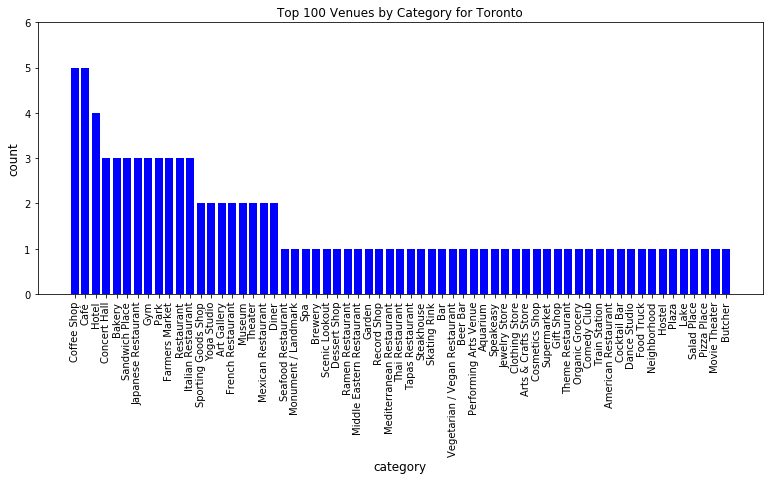

In [84]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Toronto_venues['index'], Toronto_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Toronto')
plt.ylim([0,6])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Toronto_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [85]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Toronto_venues['CUMSUM'] = Toronto_venues['categories'].cumsum()
Toronto_venues['CUMSUM_PERC'] = 100*Toronto_venues['CUMSUM']/Toronto_venues['categories'].sum()
Toronto_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Toronto_venues.head(10)

index  categories  CUMSUM  CUMSUM_PERC
0           Coffee Shop           5       5          5.0
1                  Café           5      10         10.0
2                 Hotel           4      14         14.0
5        Sandwich Place           3      23         23.0
10           Restaurant           3      38         38.0
8                  Park           3      32         32.0
6   Japanese Restaurant           3      26         26.0
11   Italian Restaurant           3      41         41.0
7                   Gym           3      29         29.0
9        Farmers Market           3      35         35.0

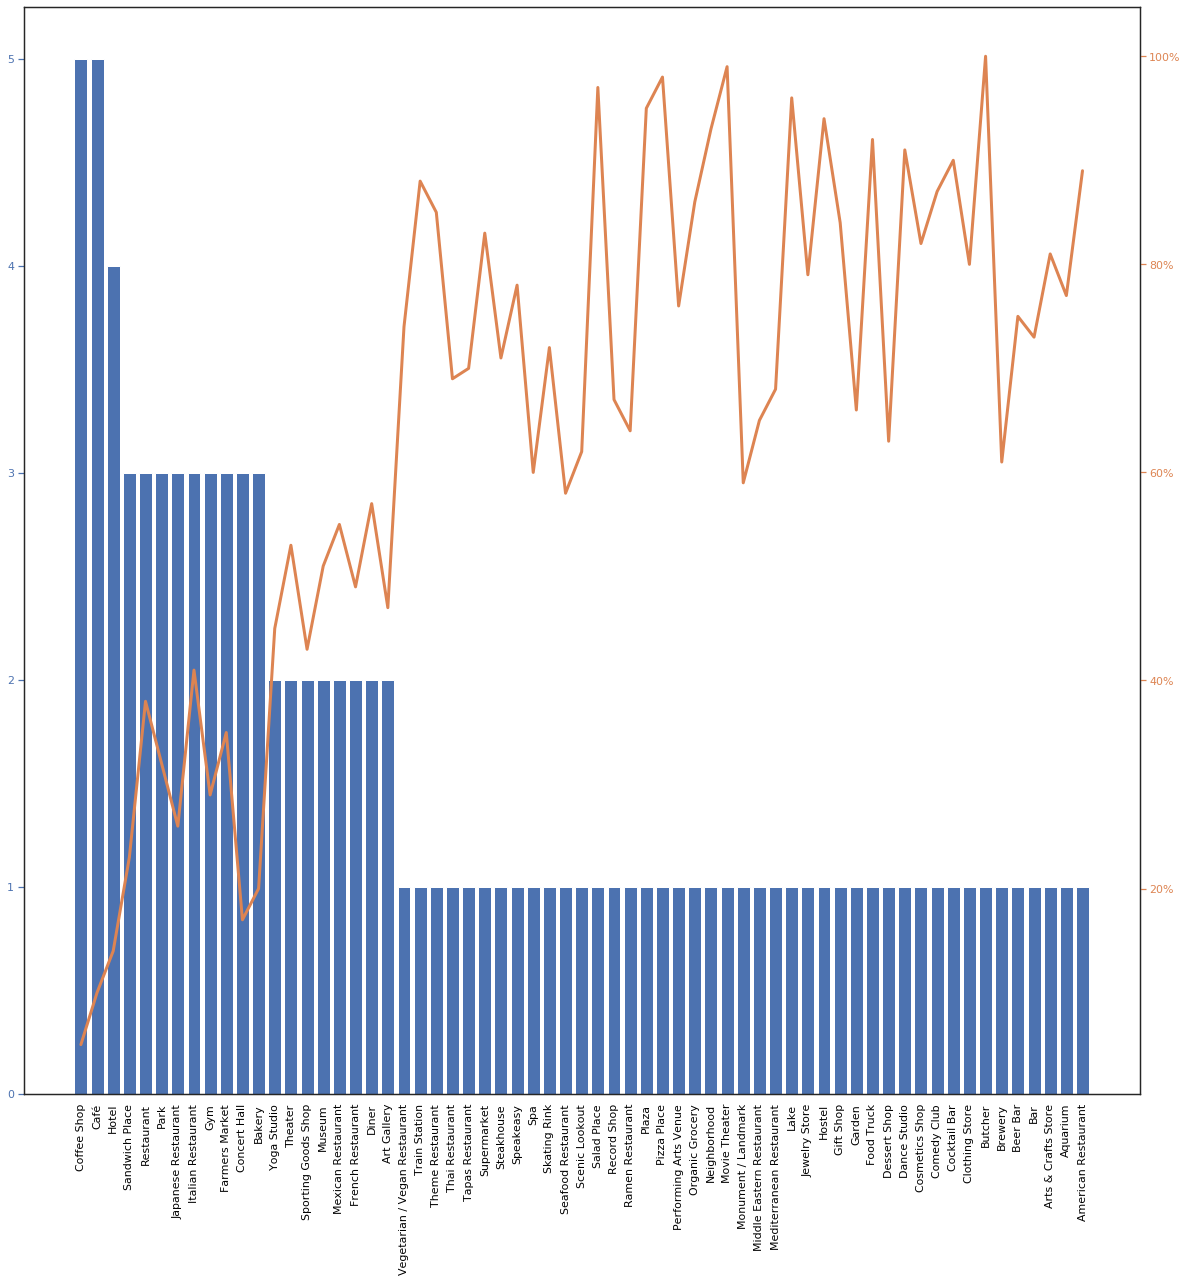

In [86]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Toronto_venues['index'], Toronto_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Toronto_venues['index'], Toronto_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [87]:
# Let us group Toronto venues by names
Toronto_venues=nearby_venues_T['name'].value_counts().reset_index()
Toronto_venues.head()

index  name
0   Jimmy's Coffee     2
1     Banh Mi Boys     2
2     401 Richmond     1
3        Bar Raval     1
4  The Second City     1

In [88]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_T['lat'], nearby_venues_T['lng'], nearby_venues_T['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)
    folium.Circle(
    [latitude, longitude],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [89]:
# Compare distances from center in Toronto
Toronto_Dist=nearby_venues_T[['distance','lat','lng']]
Toronto_Dist.head()

distance        lat        lng
0       174  43.653232 -79.385296
1       460  43.654003 -79.392922
2       391  43.650592 -79.385806
3       681  43.647923 -79.388579
4       712  43.647615 -79.388381

In [90]:
Toronto_Dist['distance'].describe()

count     100.000000
mean     1210.020000
std       403.324292
min       174.000000
25%       950.500000
50%      1201.000000
75%      1493.250000
max      2092.000000
Name: distance, dtype: float64

In [91]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Toronto_Dist.loc[(Toronto_Dist['lat'] > latitude) & (Toronto_Dist['lng'] > longitude), 'Quadrant'] = 'Q1'
Toronto_Dist.loc[(Toronto_Dist['lat'] > latitude) & (Toronto_Dist['lng'] < longitude), 'Quadrant'] = 'Q2'
Toronto_Dist.loc[(Toronto_Dist['lat'] < latitude) & (Toronto_Dist['lng'] < longitude), 'Quadrant'] = 'Q3'
Toronto_Dist.loc[(Toronto_Dist['lat'] < latitude) & (Toronto_Dist['lng'] > longitude), 'Quadrant'] = 'Q4'                                               
Toronto_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0       174  43.653232 -79.385296       Q4
1       460  43.654003 -79.392922       Q2
2       391  43.650592 -79.385806       Q4
3       681  43.647923 -79.388579       Q3
4       712  43.647615 -79.388381       Q3

In [92]:
# Now I want to count by quadrants
Toronto_D=Toronto_Dist['Quadrant'].value_counts().reset_index()
Toronto_D.sort_values(by=['index'], ascending=True, inplace=True)
Toronto_D

index  Quadrant
3    Q1         9
2    Q2        16
1    Q3        34
0    Q4        41

In [93]:
# Let us group Vancouver venues by categories
Vancouver_venues=nearby_venues_V['categories'].value_counts().reset_index()
Vancouver_venues.head()

index  categories
0     Coffee Shop           7
1          Bakery           6
2            Park           5
3            Café           4
4  Ice Cream Shop           4

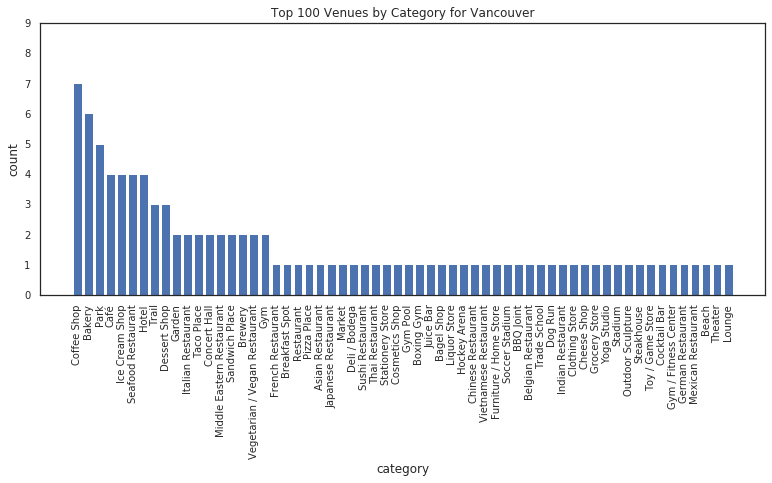

In [94]:
# Let us do a bar chart
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Vancouver_venues['index'], Vancouver_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Vancouver')
plt.ylim([0,9])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Vancouver_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [95]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Vancouver venues
Vancouver_venues['CUMSUM'] = Vancouver_venues['categories'].cumsum()
Vancouver_venues['CUMSUM_PERC'] = 100*Vancouver_venues['CUMSUM']/Vancouver_venues['categories'].sum()
Vancouver_venues.sort_values(by=['categories'], ascending=False, inplace=True)
Vancouver_venues.head(10)

index  categories  CUMSUM  CUMSUM_PERC
0          Coffee Shop           7       7          7.0
1               Bakery           6      13         13.0
2                 Park           5      18         18.0
3                 Café           4      22         22.0
4       Ice Cream Shop           4      26         26.0
5   Seafood Restaurant           4      30         30.0
6                Hotel           4      34         34.0
7                Trail           3      37         37.0
8         Dessert Shop           3      40         40.0
14      Sandwich Place           2      52         52.0

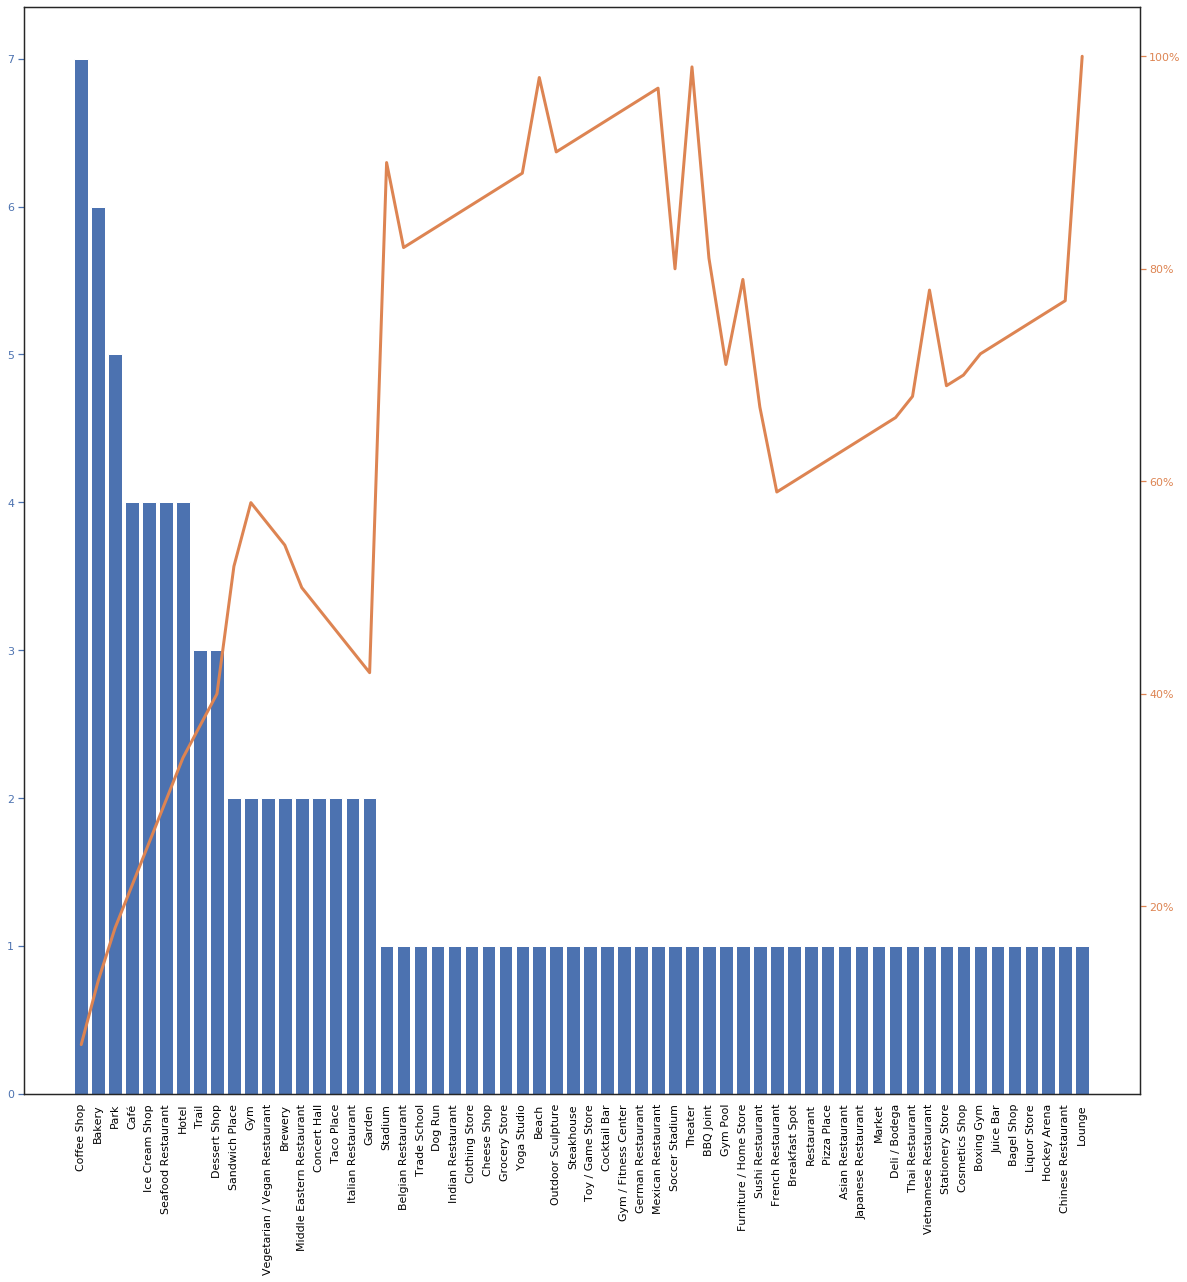

In [96]:
# Make a Pareto Chart plot for Vancouver Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Vancouver_venues['index'], Vancouver_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Vancouver_venues['index'], Vancouver_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [97]:
# Let us group Vancouver venues by names
Vancouver_venues=nearby_venues_V['name'].value_counts().reset_index()
Vancouver_venues.head()

index  name
0     Matchstick Coffee Roasters     2
1              Earnest Ice Cream     2
2        Nero Belgian Waffle Bar     1
3  iLoveKickboxing.com Vancouver     1
4                       BC Place     1

In [98]:
# create map of Vancouver using latitude and longitude values
map_Vancouver2 = folium.Map(location=[latitude_V, longitude_V], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_V['lat'], nearby_venues_V['lng'], nearby_venues_V['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver2)
    folium.Circle(
    [latitude_V, longitude_V],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Vancouver2)  
    
map_Vancouver2

In [99]:
# Compare distances from center in Vancouver
Vancouver_Dist=nearby_venues_V[['distance','lat','lng']]
Vancouver_Dist.head()

distance        lat         lng
0       709  49.263857 -123.105330
1       363  49.264018 -123.115303
2       381  49.257525 -123.115083
3       307  49.263534 -123.112795
4       775  49.264621 -123.104963

In [100]:
Vancouver_Dist['distance'].describe()

count     100.00000
mean     1826.70000
std       606.80532
min       307.00000
25%      1605.50000
50%      1952.00000
75%      2247.00000
max      2726.00000
Name: distance, dtype: float64

In [101]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Vancouver_Dist.loc[(Vancouver_Dist['lat'] > latitude_V) & (Vancouver_Dist['lng'] > longitude_V), 'Quadrant'] = 'Q1'
Vancouver_Dist.loc[(Vancouver_Dist['lat'] > latitude_V) & (Vancouver_Dist['lng'] < longitude_V), 'Quadrant'] = 'Q2'
Vancouver_Dist.loc[(Vancouver_Dist['lat'] < latitude_V) & (Vancouver_Dist['lng'] < longitude_V), 'Quadrant'] = 'Q3'
Vancouver_Dist.loc[(Vancouver_Dist['lat'] < latitude_V) & (Vancouver_Dist['lng'] > longitude_V), 'Quadrant'] = 'Q4'                                               
Vancouver_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat         lng Quadrant
0       709  49.263857 -123.105330       Q1
1       363  49.264018 -123.115303       Q2
2       381  49.257525 -123.115083       Q3
3       307  49.263534 -123.112795       Q1
4       775  49.264621 -123.104963       Q1

In [102]:
# Now I want to count by quadrants
Vancouver_D=Vancouver_Dist['Quadrant'].value_counts().reset_index()
Vancouver_D.sort_values(by=['index'], ascending=True, inplace=True)
Vancouver_D

index  Quadrant
1    Q1        35
0    Q2        47
3    Q3         3
2    Q4        15

In [103]:
# Let us group Toronto venues by categories
Calgary_venues=nearby_venues_C['categories'].value_counts().reset_index()
Calgary_venues.head()

index  categories
0     Restaurant           8
1    Coffee Shop           6
2          Hotel           5
3          Diner           4
4  Deli / Bodega           4

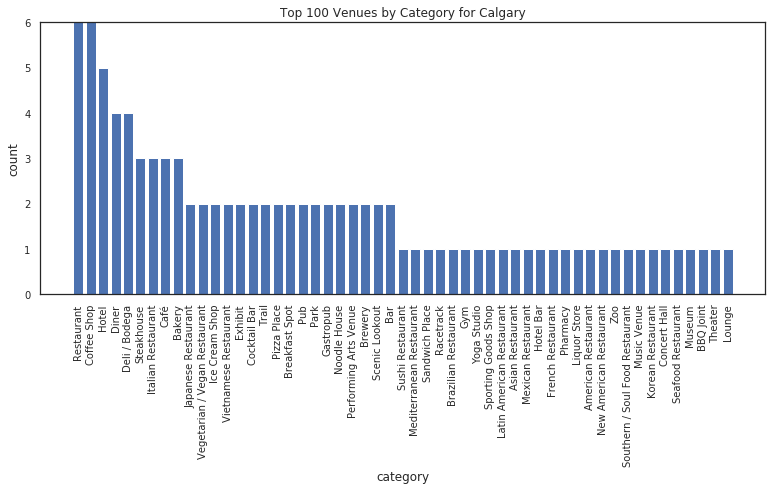

In [104]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Calgary_venues['index'], Calgary_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Calgary')
plt.ylim([0,6])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Calgary_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [105]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Calgary_venues['CUMSUM'] = Calgary_venues['categories'].cumsum()
Calgary_venues['CUMSUM_PERC'] = 100*Calgary_venues['CUMSUM']/Calgary_venues['categories'].sum()
Calgary_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Calgary_venues.head(10)

index  categories  CUMSUM  CUMSUM_PERC
0              Restaurant           8       8          8.0
1             Coffee Shop           6      14         14.0
2                   Hotel           5      19         19.0
3                   Diner           4      23         23.0
4           Deli / Bodega           4      27         27.0
5              Steakhouse           3      30         30.0
6      Italian Restaurant           3      33         33.0
7                    Café           3      36         36.0
8                  Bakery           3      39         39.0
12  Vietnamese Restaurant           2      47         47.0

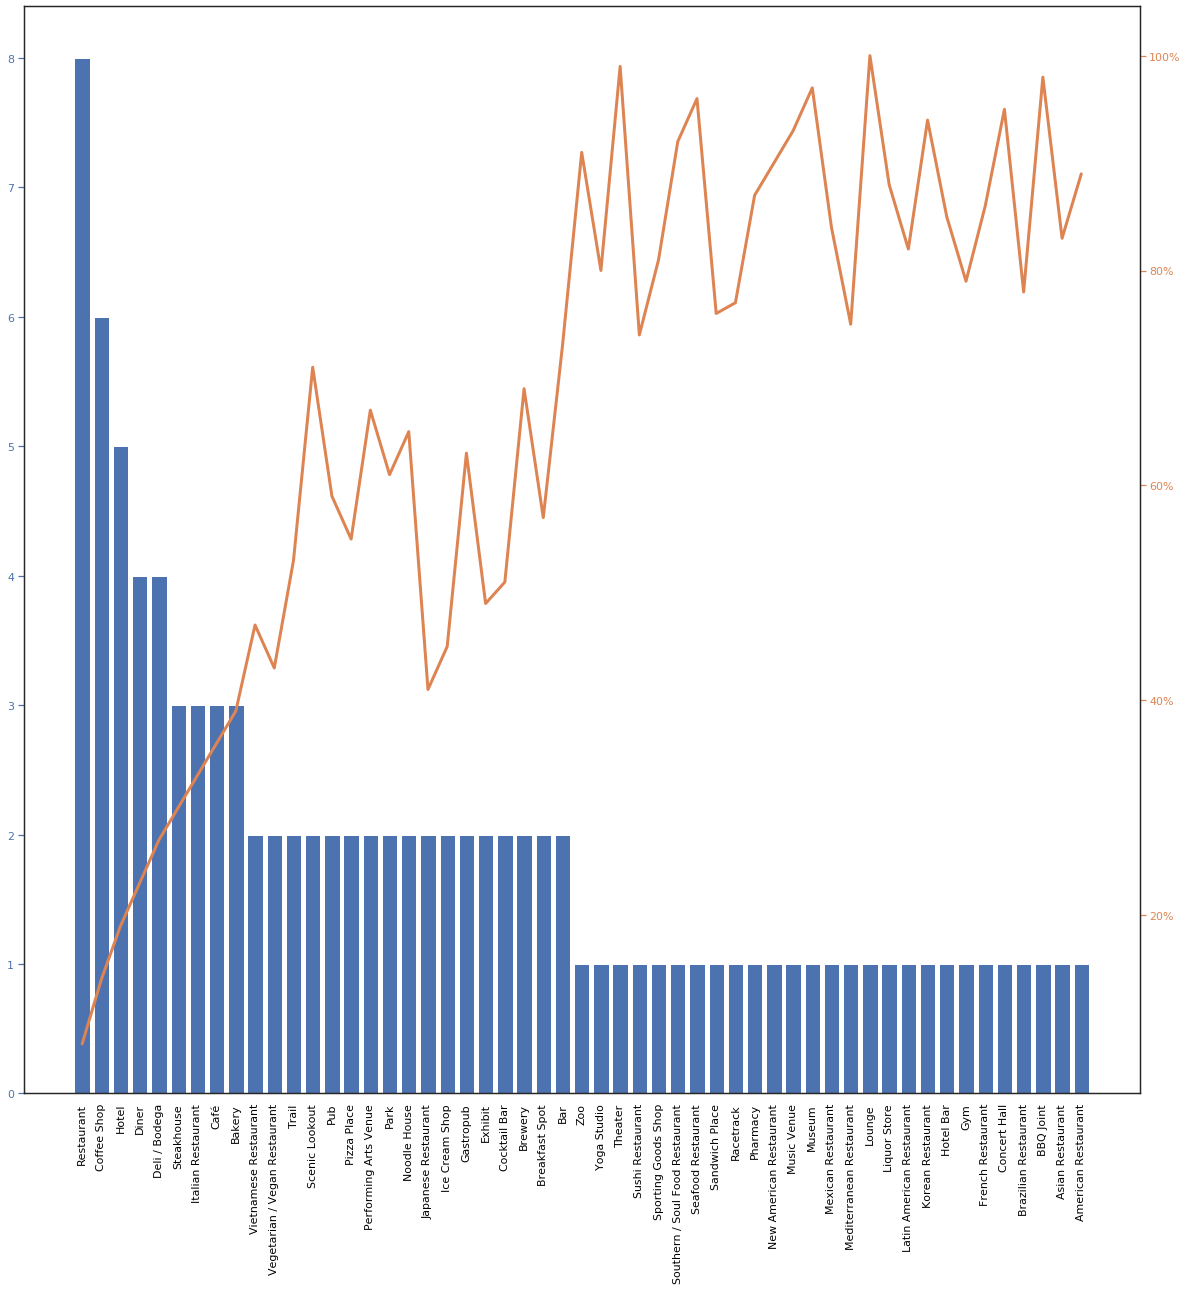

In [106]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Calgary_venues['index'], Calgary_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Calgary_venues['index'], Calgary_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [107]:
# Let us group Toronto venues by names
Calgary_venues=nearby_venues_C['name'].value_counts().reset_index()
Calgary_venues.head()

index  name
0  Over Easy Breakfast     2
1   Tazza Deli & Grill     1
2      Vertigo Theatre     1
3               Zipang     1
4               Teatro     1

In [108]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Calgary = folium.Map(location=[latitude_C, longitude_C], zoom_start=10)

In [109]:
# add markers to map
for lat, lng, label in zip(nearby_venues_C['lat'], nearby_venues_C['lng'], nearby_venues_C['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Calgary)
    folium.Circle(
    [latitude_C, longitude_C],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Calgary)  
    
map_Calgary

In [110]:
# Compare distances from center in Toronto
Calgary_Dist=nearby_venues_C[['distance','lat','lng']]
Calgary_Dist.head()

distance        lat         lng
0       538  51.054884 -114.069929
1      1074  51.047816 -114.050092
2       589  51.048561 -114.065917
3       985  51.045966 -114.070166
4      1014  51.044677 -114.058510

In [111]:
Calgary_Dist['distance'].describe()

count     100.000000
mean     1452.460000
std       637.506671
min       289.000000
25%       941.500000
50%      1373.000000
75%      1929.750000
max      2810.000000
Name: distance, dtype: float64

In [112]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Calgary_Dist.loc[(Calgary_Dist['lat'] > latitude_C) & (Calgary_Dist['lng'] > longitude_C), 'Quadrant'] = 'Q1'
Calgary_Dist.loc[(Calgary_Dist['lat'] > latitude_C) & (Calgary_Dist['lng'] < longitude_C), 'Quadrant'] = 'Q2'
Calgary_Dist.loc[(Calgary_Dist['lat'] < latitude_C) & (Calgary_Dist['lng'] < longitude_C), 'Quadrant'] = 'Q3'
Calgary_Dist.loc[(Calgary_Dist['lat'] < latitude_C) & (Calgary_Dist['lng'] > longitude_C), 'Quadrant'] = 'Q4'                                               
Calgary_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat         lng Quadrant
0       538  51.054884 -114.069929       Q2
1      1074  51.047816 -114.050092       Q4
2       589  51.048561 -114.065917       Q3
3       985  51.045966 -114.070166       Q3
4      1014  51.044677 -114.058510       Q4

In [113]:
# Now I want to count by quadrants
Calgary_D=Calgary_Dist['Quadrant'].value_counts().reset_index()
Calgary_D.sort_values(by=['index'], ascending=True, inplace=True)
Calgary_D

index  Quadrant
3    Q1         6
2    Q2         8
0    Q3        53
1    Q4        33

In [114]:
# Let us group Toronto venues by categories
Charl_venues=nearby_venues_Ch['categories'].value_counts().reset_index()
Charl_venues.head()

index  categories
0           Coffee Shop          13
1  Fast Food Restaurant           4
2           Gas Station           4
3            Restaurant           4
4        Ice Cream Shop           4

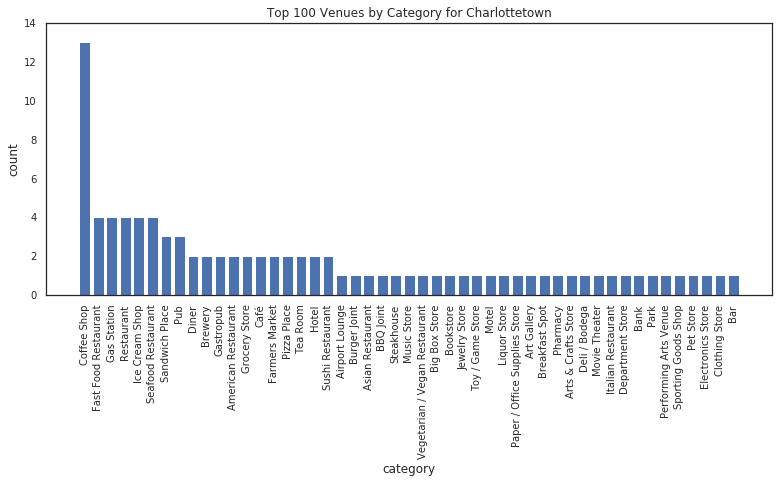

In [115]:
# Let us do a bar chart for Charlottetown venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Charl_venues['index'], Charl_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Charlottetown')
plt.ylim([0,14])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Charl_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [116]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Charl_venues['CUMSUM'] = Charl_venues['categories'].cumsum()
Charl_venues['CUMSUM_PERC'] = 100*Charl_venues['CUMSUM']/Charl_venues['categories'].sum()
Charl_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Charl_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0         Coffee Shop          13      13    14.285714
5  Seafood Restaurant           4      33    36.263736
3          Restaurant           4      25    27.472527
4      Ice Cream Shop           4      29    31.868132
2         Gas Station           4      21    23.076923

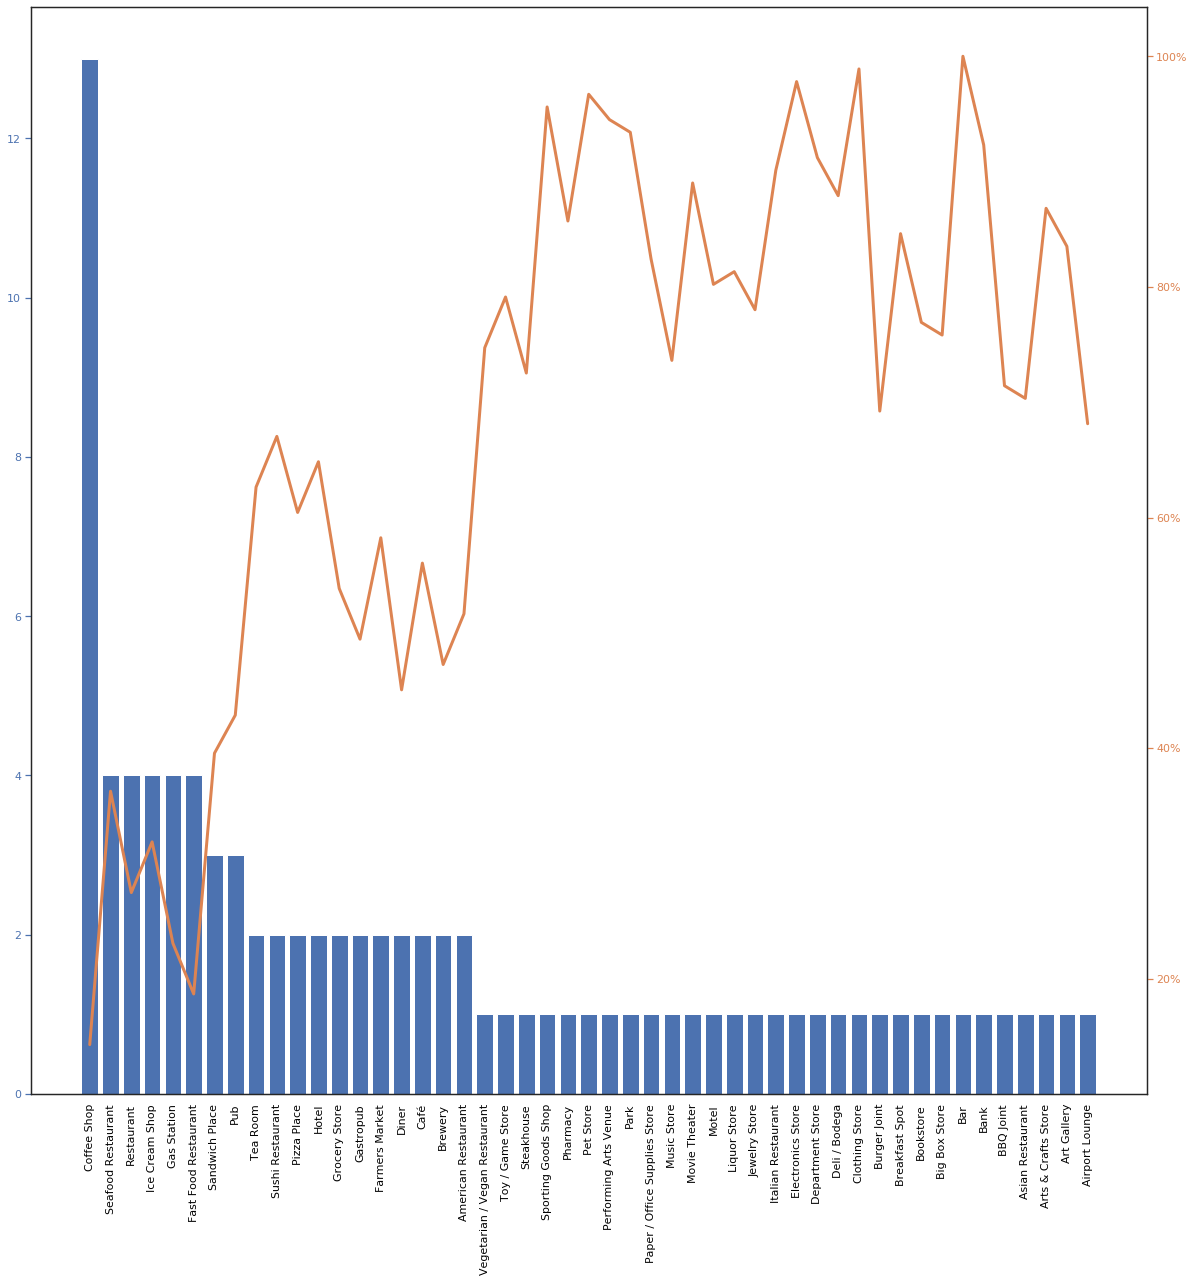

In [117]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Charl_venues['index'], Charl_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Charl_venues['index'], Charl_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [118]:
# Let us group Toronto venues by names
Charl_venues=nearby_venues_Ch['name'].value_counts().reset_index()
Charl_venues.head()

index  name
0             Tim Hortons     6
1               Starbucks     3
2            Petro-Canada     3
3                  Subway     2
4  Timothy's World Coffee     1

In [119]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Charl = folium.Map(location=[latitude_Ch, longitude_Ch], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_Ch['lat'], nearby_venues_Ch['lng'], nearby_venues_Ch['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Charl)
    folium.Circle(
    [latitude_Ch, longitude_Ch],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Charl)  
    
map_Charl

In [120]:
# Compare distances from center in Toronto
Charl_Dist=nearby_venues_Ch[['distance','lat','lng']]
Charl_Dist['distance'].describe()

count      91.000000
mean     4895.098901
std      1792.694267
min       524.000000
25%      3295.000000
50%      5275.000000
75%      6316.000000
max      9917.000000
Name: distance, dtype: float64

In [121]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Charl_Dist.loc[(Charl_Dist['lat'] > latitude_Ch) & (Charl_Dist['lng'] > longitude_Ch), 'Quadrant'] = 'Q1'
Charl_Dist.loc[(Charl_Dist['lat'] > latitude_Ch) & (Charl_Dist['lng'] < longitude_Ch), 'Quadrant'] = 'Q2'
Charl_Dist.loc[(Charl_Dist['lat'] < latitude_Ch) & (Charl_Dist['lng'] < longitude_Ch), 'Quadrant'] = 'Q3'
Charl_Dist.loc[(Charl_Dist['lat'] < latitude_Ch) & (Charl_Dist['lng'] > longitude_Ch), 'Quadrant'] = 'Q4'                                               
Charl_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0      2903  46.267761 -63.147500       Q3
1      4949  46.246246 -63.131956       Q3
2      5236  46.259100 -63.179924       Q3
3      4374  46.252633 -63.115256       Q4
4      3044  46.266250 -63.147268       Q3

In [122]:
# Now I want to count by quadrants
Charl_D=Charl_Dist['Quadrant'].value_counts().reset_index()
Charl_D.sort_values(by=['index'], ascending=True, inplace=True)
Charl_D.head()

index  Quadrant
3    Q1         1
2    Q2         1
0    Q3        45
1    Q4        44

In [123]:
# Let us group Toronto venues by categories
Fred_venues=nearby_venues_F['categories'].value_counts().reset_index()
Fred_venues.head()

index  categories
0    Coffee Shop          10
1     Restaurant           8
2  Grocery Store           7
3            Pub           7
4            Bar           4

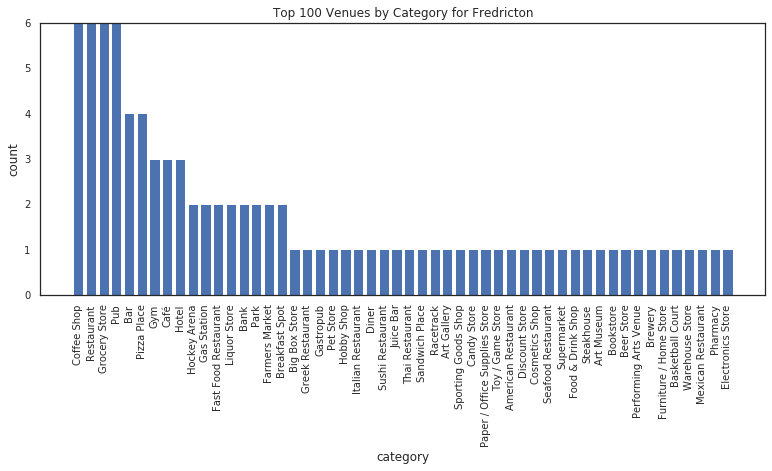

In [124]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Fred_venues['index'], Fred_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Fredricton')
plt.ylim([0,6])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Fred_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [125]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Fred_venues['CUMSUM'] = Fred_venues['categories'].cumsum()
Fred_venues['CUMSUM_PERC'] = 100*Fred_venues['CUMSUM']/Fred_venues['categories'].sum()
Fred_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Fred_venues.head(10)

index  categories  CUMSUM  CUMSUM_PERC
0     Coffee Shop          10      10         10.0
1      Restaurant           8      18         18.0
3             Pub           7      32         32.0
2   Grocery Store           7      25         25.0
5     Pizza Place           4      40         40.0
4             Bar           4      36         36.0
8           Hotel           3      49         49.0
6             Gym           3      43         43.0
7            Café           3      46         46.0
14           Park           2      61         61.0

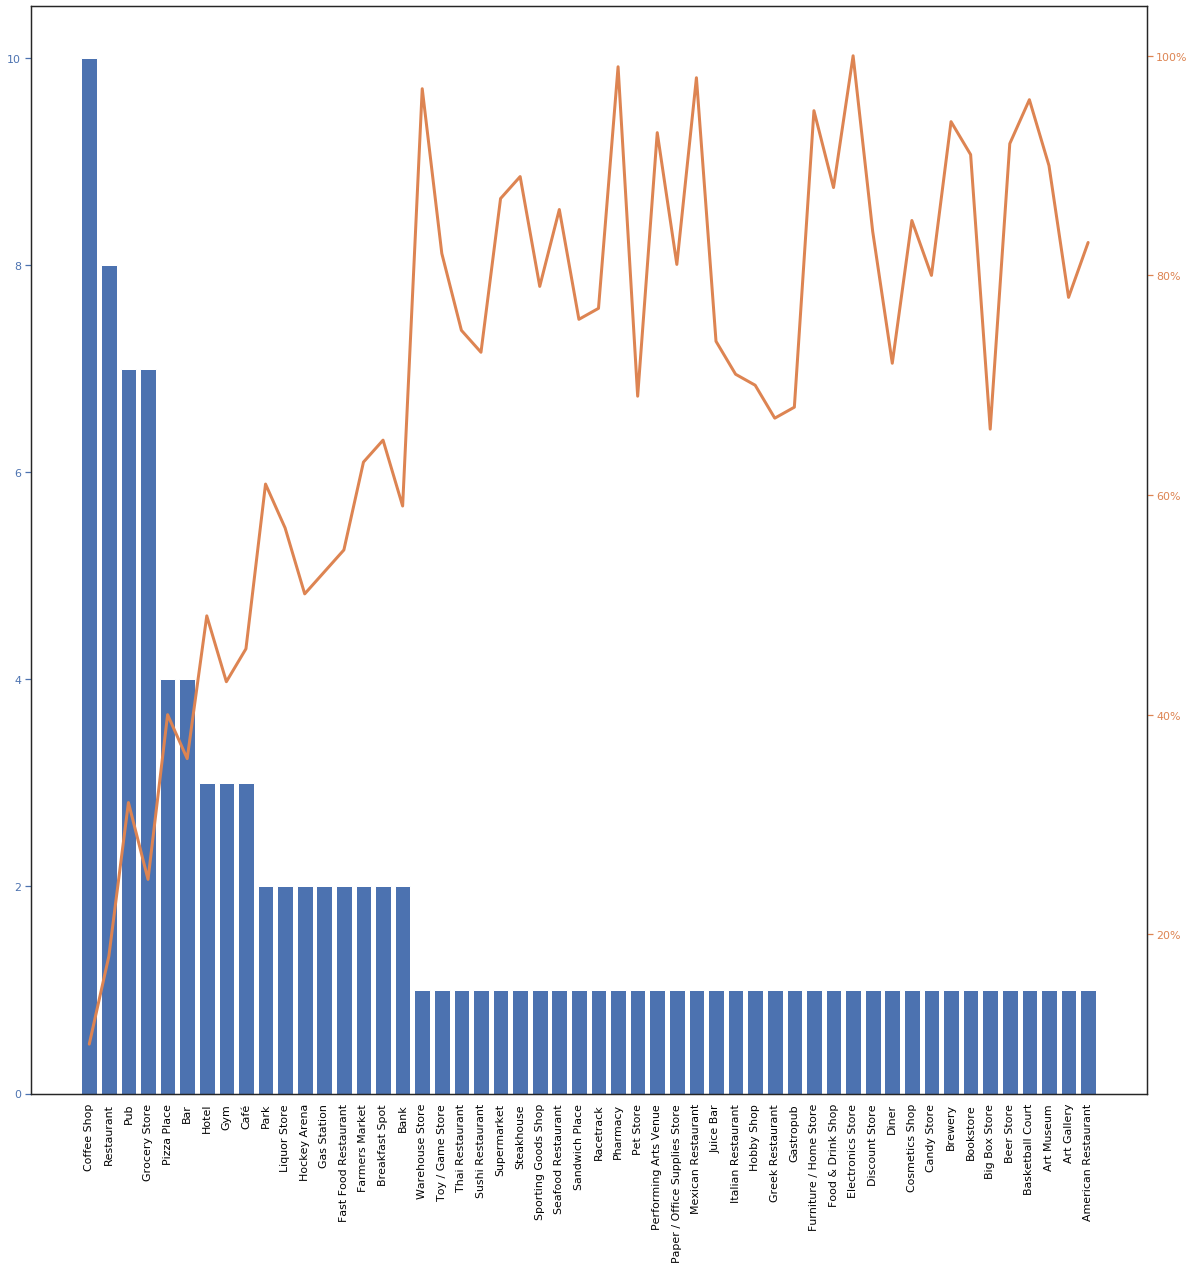

In [126]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Fred_venues['index'], Fred_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Fred_venues['index'], Fred_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [127]:
# Let us group Toronto venues by names
Fred_venues=nearby_venues_F['name'].value_counts().reset_index()
Fred_venues.head(10)

index  name
0          Tim Hortons     4
1           Second Cup     2
2               Sobeys     2
3             Circle K     2
4      TD Canada Trust     2
5     Alcool NB Liquor     2
6     GoodLife Fitness     2
7  Atlantic Superstore     2
8   coffee and friends     1
9             Chapters     1

In [128]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Fred = folium.Map(location=[latitude_F, longitude_F], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_F['lat'], nearby_venues_F['lng'], nearby_venues_F['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Fred)
    folium.Circle(
    [latitude_F, longitude_F],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Fred)  
    
map_Fred

In [129]:
# Compare distances from center in Toronto
Fred_Dist=nearby_venues_F[['distance','lat','lng']]
Fred_Dist['distance'].describe()

count     100.000000
mean     2206.900000
std      1689.284467
min       275.000000
25%       825.750000
50%      1466.500000
75%      3332.500000
max      9618.000000
Name: distance, dtype: float64

In [130]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Fred_Dist.loc[(Fred_Dist['lat'] > latitude_F) & (Fred_Dist['lng'] > longitude_F), 'Quadrant'] = 'Q1'
Fred_Dist.loc[(Fred_Dist['lat'] > latitude_F) & (Fred_Dist['lng'] < longitude_F), 'Quadrant'] = 'Q2'
Fred_Dist.loc[(Fred_Dist['lat'] < latitude_F) & (Fred_Dist['lng'] < longitude_F), 'Quadrant'] = 'Q3'
Fred_Dist.loc[(Fred_Dist['lat'] < latitude_F) & (Fred_Dist['lng'] > longitude_F), 'Quadrant'] = 'Q4'                                               
Fred_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0      1017  45.958354 -66.639654       Q4
1       551  45.962338 -66.641776       Q4
2       883  45.959998 -66.639116       Q4
3       478  45.962701 -66.642731       Q4
4       822  45.960794 -66.638927       Q4

In [131]:
# Now I want to count by quadrants
Fred_D=Fred_Dist['Quadrant'].value_counts().reset_index()
Fred_D.sort_values(by=['index'], ascending=True, inplace=True)
Fred_D.head()

index  Quadrant
3    Q1         7
2    Q2         7
0    Q3        50
1    Q4        36

In [132]:
# Let us group Toronto venues by categories
Halifax_venues=nearby_venues_H['categories'].value_counts().reset_index()
Halifax_venues.head()

index  categories
0          Restaurant           7
1         Coffee Shop           7
2         Pizza Place           4
3               Hotel           4
4  Italian Restaurant           4

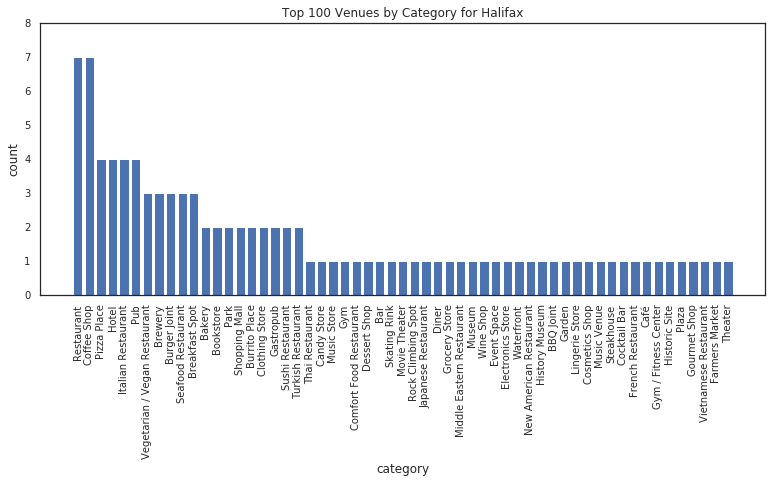

In [133]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Halifax_venues['index'], Halifax_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Halifax')
plt.ylim([0,8])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Halifax_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [134]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Halifax_venues['CUMSUM'] = Halifax_venues['categories'].cumsum()
Halifax_venues['CUMSUM_PERC'] = 100*Halifax_venues['CUMSUM']/Halifax_venues['categories'].sum()
Halifax_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Halifax_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0          Restaurant           7       7          7.0
1         Coffee Shop           7      14         14.0
5                 Pub           4      30         30.0
2         Pizza Place           4      18         18.0
4  Italian Restaurant           4      26         26.0

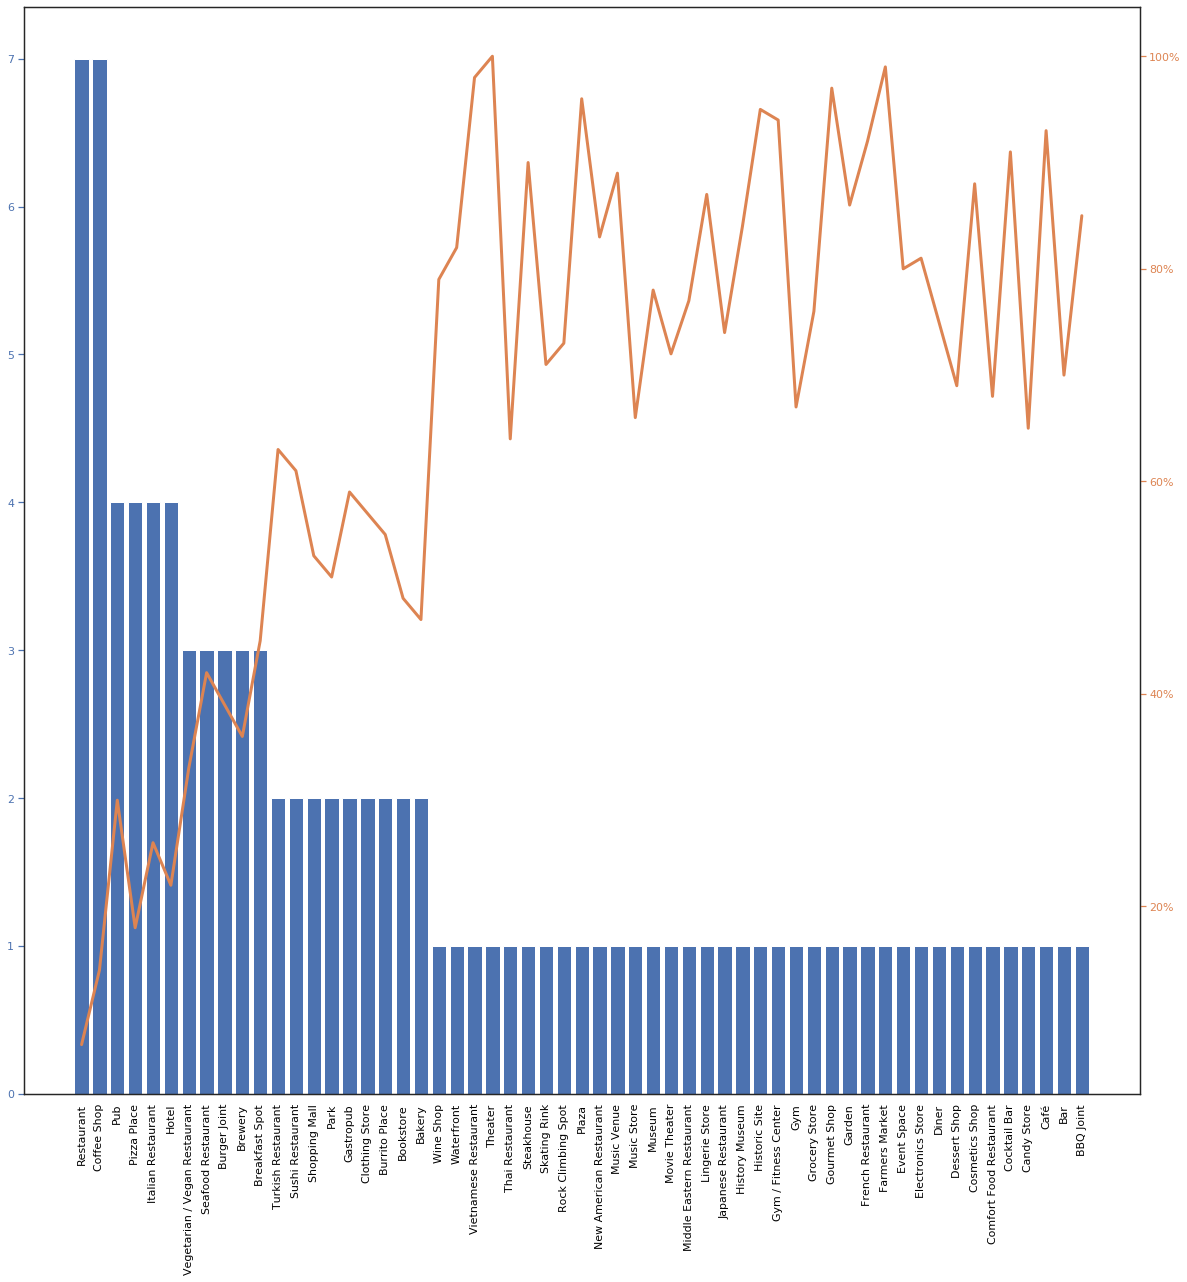

In [135]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Halifax_venues['index'], Halifax_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Halifax_venues['index'], Halifax_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [136]:
# Let us group Toronto venues by names
Halifax_venues=nearby_venues_H['name'].value_counts().reset_index()
Halifax_venues.head()

index  name
0                     Burrito Jax     2
1  The Carleton Music Bar & Grill     1
2                     Black Sheep     1
3              Stillwell Beer Bar     1
4                   Victoria Park     1

In [137]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Halifax = folium.Map(location=[latitude_H, longitude_H], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_H['lat'], nearby_venues_H['lng'], nearby_venues_H['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Halifax)
    folium.Circle(
    [latitude_H, longitude_H],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Halifax)  
    
map_Halifax

In [138]:
# Compare distances from center in Toronto
Halifax_Dist=nearby_venues_H[['distance','lat','lng']]
Halifax_Dist['distance'].describe()

count     100.00000
mean     1326.51000
std       699.70553
min       127.00000
25%       868.25000
50%      1082.00000
75%      1659.50000
max      3598.00000
Name: distance, dtype: float64

In [139]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Halifax_Dist.loc[(Halifax_Dist['lat'] > latitude_H) & (Halifax_Dist['lng'] > longitude_H), 'Quadrant'] = 'Q1'
Halifax_Dist.loc[(Halifax_Dist['lat'] > latitude_H) & (Halifax_Dist['lng'] < longitude_H), 'Quadrant'] = 'Q2'
Halifax_Dist.loc[(Halifax_Dist['lat'] < latitude_H) & (Halifax_Dist['lng'] < longitude_H), 'Quadrant'] = 'Q3'
Halifax_Dist.loc[(Halifax_Dist['lat'] < latitude_H) & (Halifax_Dist['lng'] > longitude_H), 'Quadrant'] = 'Q4'                                               
Halifax_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0       727  44.642766 -63.581872       Q4
1       732  44.646183 -63.594538       Q3
2       430  44.651460 -63.582254       Q1
3       974  44.646908 -63.573875       Q4
4      1261  44.647040 -63.570178       Q4

In [140]:
# Now I want to count by quadrants
Halifax_D=Halifax_Dist['Quadrant'].value_counts().reset_index()
Halifax_D.sort_values(by=['index'], ascending=True, inplace=True)
Halifax_D.head()

index  Quadrant
2    Q1        13
1    Q2        26
3    Q3         6
0    Q4        55

In [141]:
# Let us group Toronto venues by categories
Mon_venues=nearby_venues_M['categories'].value_counts().reset_index()
Mon_venues.head()

index  categories
0               Café          12
1             Bakery           5
2  French Restaurant           4
3               Park           4
4         Restaurant           4

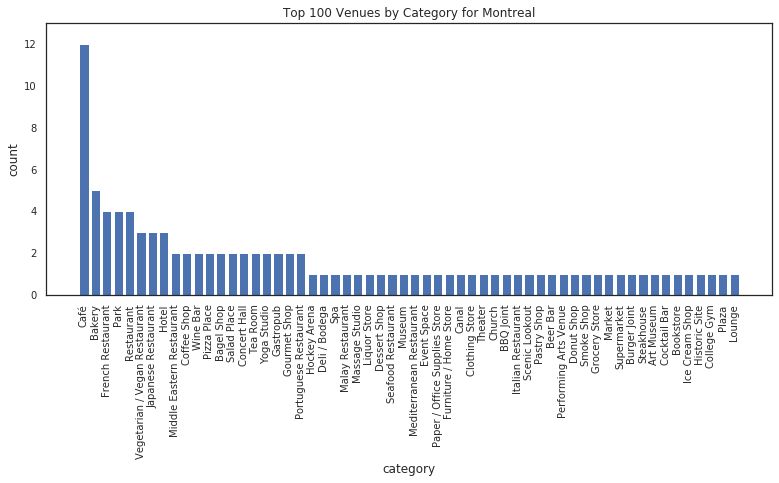

In [142]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Mon_venues['index'], Mon_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Montreal')
plt.ylim([0,13])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Mon_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [143]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Mon_venues['CUMSUM'] = Mon_venues['categories'].cumsum()
Mon_venues['CUMSUM_PERC'] = 100*Mon_venues['CUMSUM']/Mon_venues['categories'].sum()
Mon_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Mon_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0               Café          12      12         12.0
1             Bakery           5      17         17.0
4         Restaurant           4      29         29.0
3               Park           4      25         25.0
2  French Restaurant           4      21         21.0

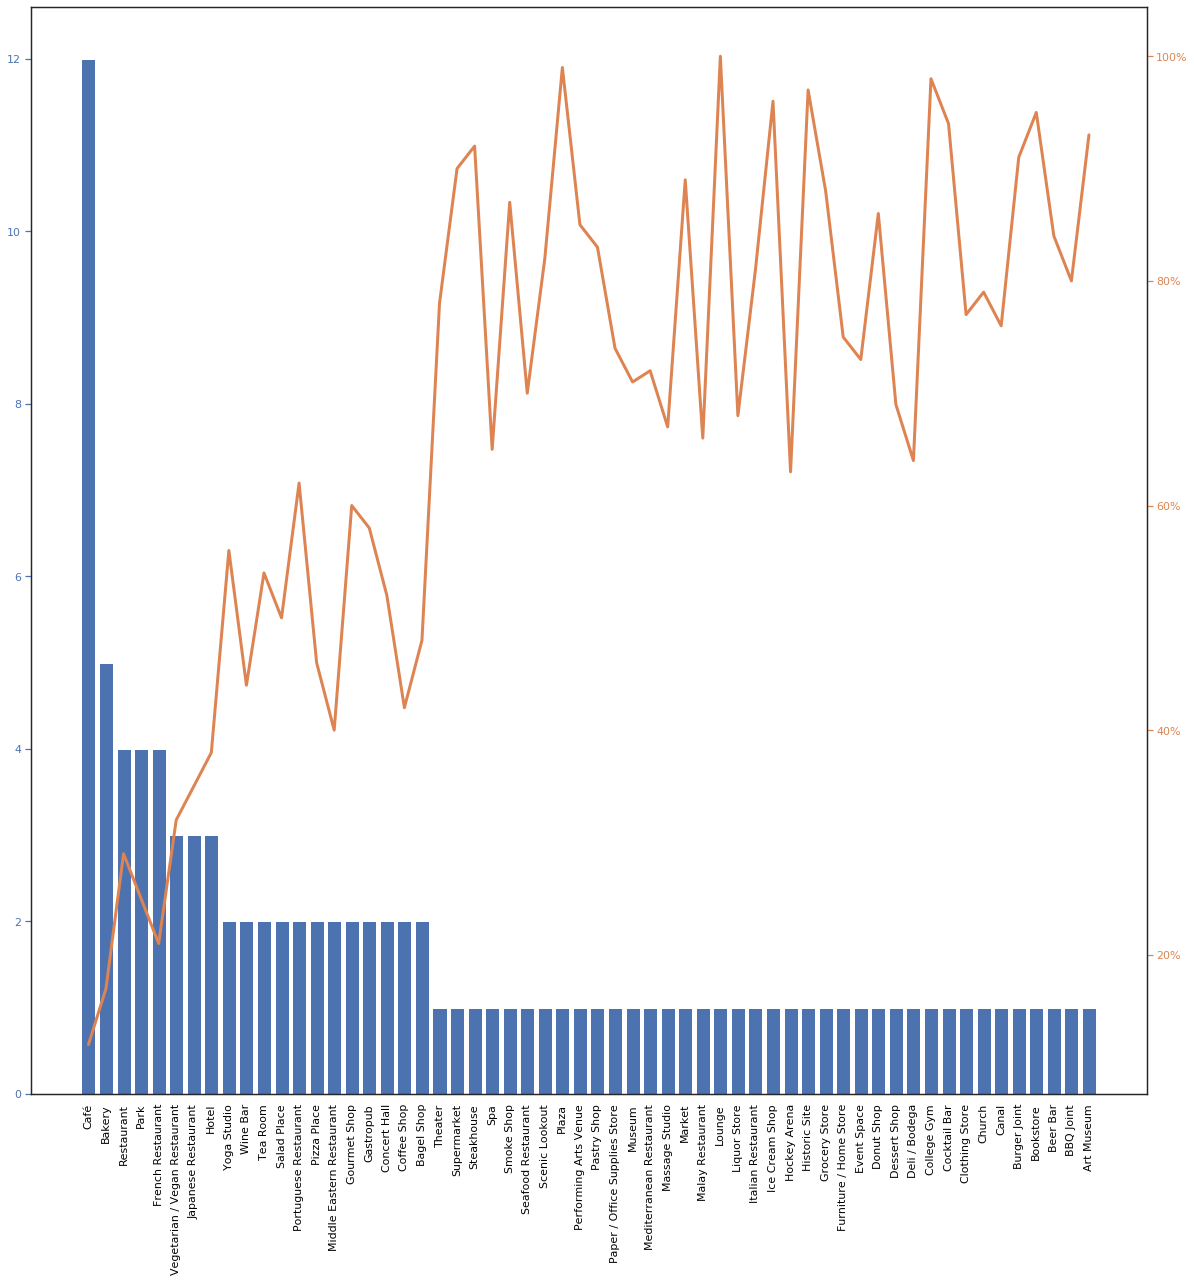

In [144]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Mon_venues['index'],Mon_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Mon_venues['index'], Mon_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [145]:
# Let us group Toronto venues by names
Mon_venues=nearby_venues_M['name'].value_counts().reset_index()
Mon_venues.head()

index  name
0            Mandy's     2
1    MELK Bar à Café     2
2  Perles et Paddock     1
3            Arsenal     1
4  Drawn & Quarterly     1

In [146]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Mon = folium.Map(location=[latitude_M, longitude_M], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_M['lat'], nearby_venues_M['lng'], nearby_venues_M['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mon)
    folium.Circle(
    [latitude_M, longitude_M],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Mon)  
    
map_Mon

In [147]:
# Compare distances from center in Toronto
Mon_Dist=nearby_venues_M[['distance','lat','lng']]
Mon_Dist['distance'].describe()

count     100.000000
mean     2951.370000
std       456.657236
min      1249.000000
25%      2697.250000
50%      3097.000000
75%      3233.500000
max      3675.000000
Name: distance, dtype: float64

In [148]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Mon_Dist.loc[(Mon_Dist['lat'] > latitude_M) & (Mon_Dist['lng'] > longitude_M), 'Quadrant'] = 'Q1'
Mon_Dist.loc[(Mon_Dist['lat'] > latitude_M) & (Mon_Dist['lng'] < longitude_M), 'Quadrant'] = 'Q2'
Mon_Dist.loc[(Mon_Dist['lat'] < latitude_M) & (Mon_Dist['lng'] < longitude_M), 'Quadrant'] = 'Q3'
Mon_Dist.loc[(Mon_Dist['lat'] < latitude_M) & (Mon_Dist['lng'] > longitude_M), 'Quadrant'] = 'Q4'                                               
Mon_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0      1249  45.508320 -73.612664       Q2
1      1953  45.504079 -73.587321       Q1
2      2010  45.481574 -73.597476       Q4
3      1935  45.503904 -73.587460       Q1
4      1965  45.503440 -73.586785       Q1

In [149]:
# Now I want to count by quadrants
Mon_D=Mon_Dist['Quadrant'].value_counts().reset_index()
Mon_D.sort_values(by=['index'], ascending=True, inplace=True)
Mon_D.head()

index  Quadrant
0    Q1        65
3    Q2         3
2    Q3         5
1    Q4        27

In [150]:
# Let us group Toronto venues by categories
SAS_venues=nearby_venues_S['categories'].value_counts().reset_index()
SAS_venues.head()

index  categories
0   Restaurant           6
1        Hotel           6
2         Café           5
3  Coffee Shop           4
4          Pub           4

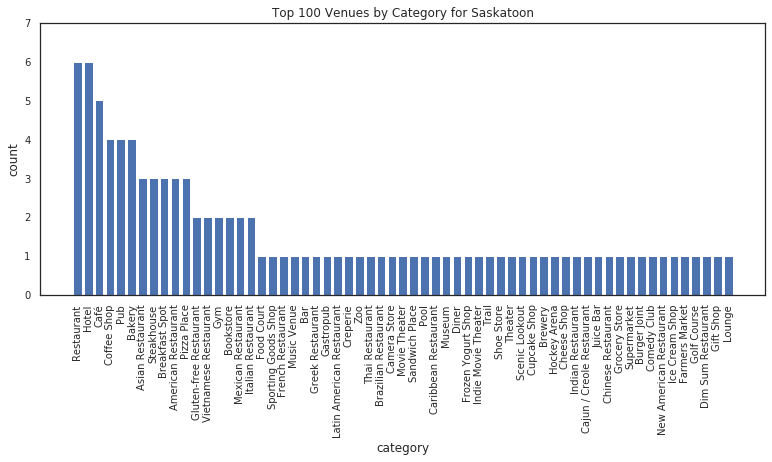

In [151]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(SAS_venues['index'], SAS_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Saskatoon')
plt.ylim([0,7])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(SAS_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [152]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
SAS_venues['CUMSUM'] = SAS_venues['categories'].cumsum()
SAS_venues['CUMSUM_PERC'] = 100*SAS_venues['CUMSUM']/SAS_venues['categories'].sum()
SAS_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
SAS_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0   Restaurant           6       6          6.0
1        Hotel           6      12         12.0
2         Café           5      17         17.0
4          Pub           4      25         25.0
3  Coffee Shop           4      21         21.0

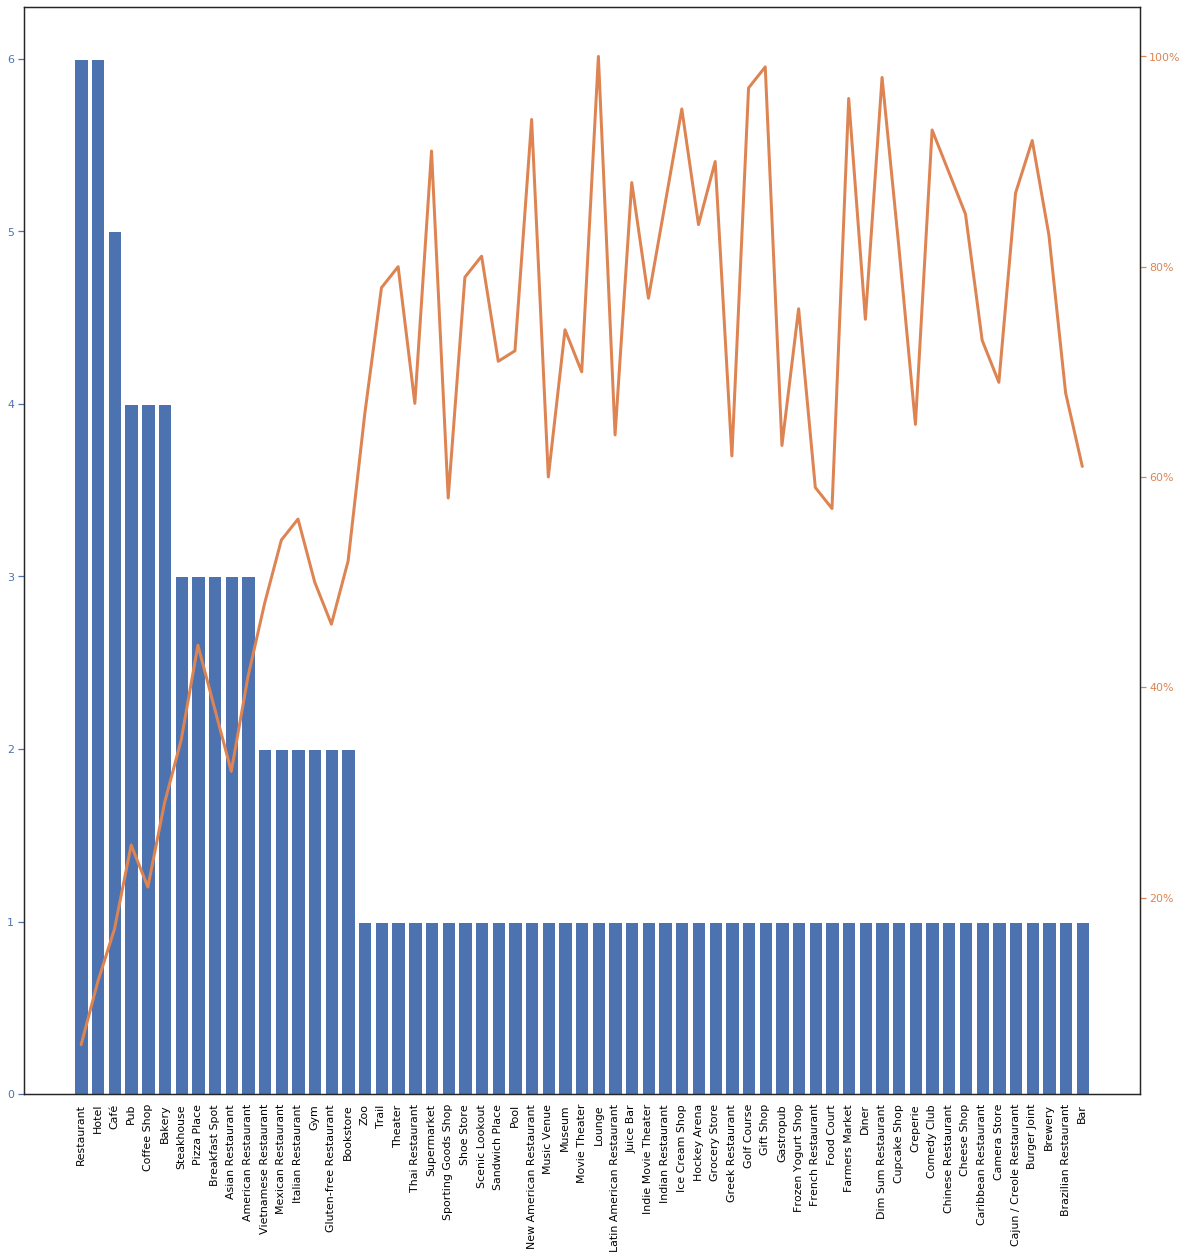

In [153]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(SAS_venues['index'], SAS_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(SAS_venues['index'], SAS_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [154]:
# Let us group Toronto venues by names
SAS_venues=nearby_venues_S['name'].value_counts().reset_index()
SAS_venues.head()

index  name
0                   Starbucks     2
1            UNA pizza + wine     1
2                     Leyda's     1
3  Western Development Museum     1
4              The Odd Couple     1

In [155]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_SAS = folium.Map(location=[latitude_S, longitude_S], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_S['lat'], nearby_venues_S['lng'], nearby_venues_S['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SAS)
    folium.Circle(
    [latitude_S, longitude_S],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_SAS)  
    
map_SAS

In [156]:
# Compare distances from center in Toronto
SAS_Dist=nearby_venues_S[['distance','lat','lng']]
SAS_Dist['distance'].describe()

count     100.000000
mean     2204.360000
std      1695.672606
min       247.000000
25%       800.000000
50%      1579.500000
75%      3152.250000
max      6556.000000
Name: distance, dtype: float64

In [157]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
SAS_Dist.loc[(SAS_Dist['lat'] > latitude_S) & (SAS_Dist['lng'] > longitude_S), 'Quadrant'] = 'Q1'
SAS_Dist.loc[(SAS_Dist['lat'] > latitude_S) & (SAS_Dist['lng'] < longitude_S), 'Quadrant'] = 'Q2'
SAS_Dist.loc[(SAS_Dist['lat'] < latitude_S) & (SAS_Dist['lng'] < longitude_S), 'Quadrant'] = 'Q3'
SAS_Dist.loc[(SAS_Dist['lat'] < latitude_S) & (SAS_Dist['lng'] > longitude_S), 'Quadrant'] = 'Q4'                                               
SAS_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat         lng Quadrant
0       507  52.127701 -106.663997       Q3
1       609  52.126327 -106.660989       Q3
2       628  52.126773 -106.664942       Q3
3       705  52.126107 -106.665309       Q3
4       797  52.125365 -106.665874       Q3

In [158]:
# Now I want to count by quadrants
SAS_D=SAS_Dist['Quadrant'].value_counts().reset_index()
SAS_D.sort_values(by=['index'], ascending=True, inplace=True)
SAS_D.head()

index  Quadrant
2    Q1        10
3    Q2         6
1    Q3        36
0    Q4        48

In [159]:
# Let us group Toronto venues by categories
Sj_venues=nearby_venues_Sj['categories'].value_counts().reset_index()
Sj_venues.head()

index  categories
0           Coffee Shop           8
1            Restaurant           7
2  Fast Food Restaurant           3
3        Scenic Lookout           3
4                   Pub           3

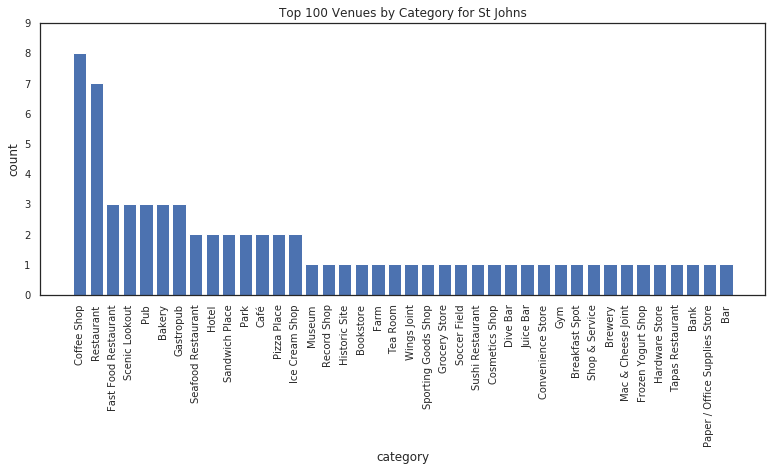

In [160]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(Sj_venues['index'], Sj_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for St Johns')
plt.ylim([0,9])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(Sj_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [161]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
Sj_venues['CUMSUM'] = Sj_venues['categories'].cumsum()
Sj_venues['CUMSUM_PERC'] = 100*Sj_venues['CUMSUM']/Sj_venues['categories'].sum()
Sj_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
Sj_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0     Coffee Shop           8       8    11.428571
1      Restaurant           7      15    21.428571
3  Scenic Lookout           3      21    30.000000
4             Pub           3      24    34.285714
6       Gastropub           3      30    42.857143

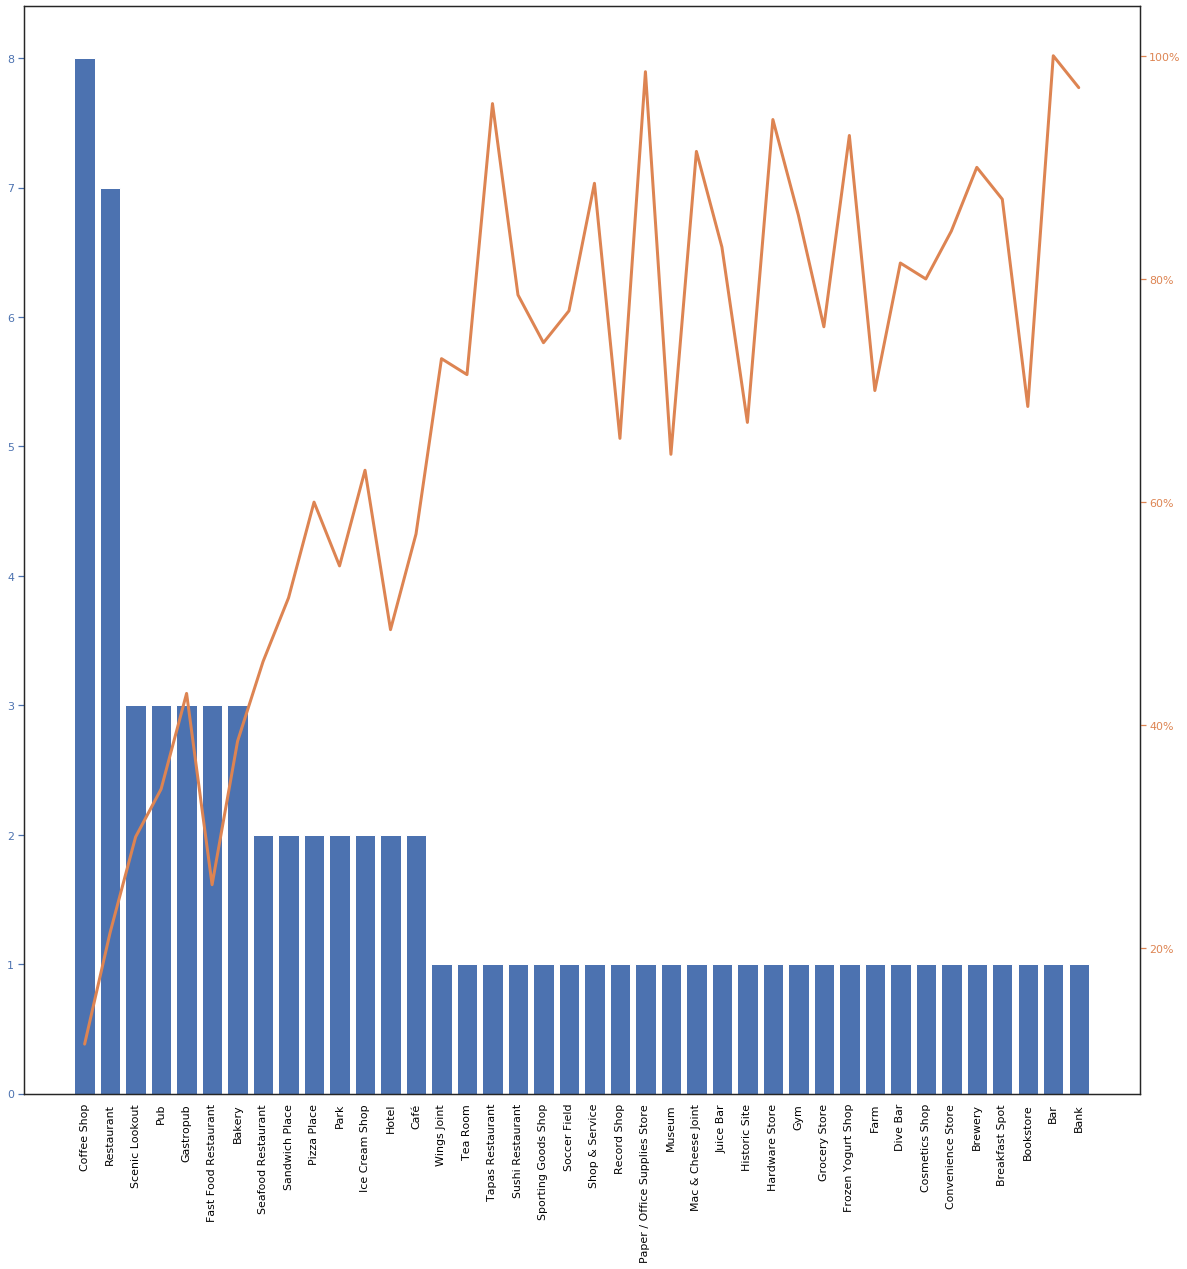

In [162]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(Sj_venues['index'], Sj_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(Sj_venues['index'], Sj_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [163]:
# Let us group Toronto venues by names
Sj_venues=nearby_venues_Sj['name'].value_counts().reset_index()
Sj_venues.head()

index  name
0      Tim Hortons     5
1        The Rooms     1
2    Canadian Tire     1
3        Wing'n It     1
4  TD Canada Trust     1

In [164]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Sj = folium.Map(location=[latitude_Sj, longitude_Sj], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_Sj['lat'], nearby_venues_Sj['lng'], nearby_venues_Sj['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Sj)
    folium.Circle(
    [latitude_Sj, longitude_Sj],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Sj)  
    
map_Sj

In [165]:
# Comaree distances from center in Toronto
Sj_Dist=nearby_venues_Sj[['distance','lat','lng']]
Sj_Dist['distance'].describe()

count      70.000000
mean     4092.885714
std      3746.334288
min       162.000000
25%       566.000000
50%      2660.000000
75%      8058.000000
max      9943.000000
Name: distance, dtype: float64

In [166]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
Sj_Dist.loc[(Sj_Dist['lat'] > latitude_Sj) & (Sj_Dist['lng'] > longitude_Sj), 'Quadrant'] = 'Q1'
Sj_Dist.loc[(Sj_Dist['lat'] > latitude_Sj) & (Sj_Dist['lng'] < longitude_Sj), 'Quadrant'] = 'Q2'
Sj_Dist.loc[(Sj_Dist['lat'] < latitude_Sj) & (Sj_Dist['lng'] < longitude_Sj), 'Quadrant'] = 'Q3'
Sj_Dist.loc[(Sj_Dist['lat'] < latitude_Sj) & (Sj_Dist['lng'] > longitude_Sj), 'Quadrant'] = 'Q4'                                               
Sj_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0       363  47.562434 -52.708892       Q1
1       290  47.562480 -52.710241       Q1
2       196  47.561266 -52.710442       Q1
3       623  47.566063 -52.711453       Q1
4       547  47.564167 -52.707905       Q1

In [167]:
# Now I want to count by quadrants
Sj_D=Sj_Dist['Quadrant'].value_counts().reset_index()
Sj_D.sort_values(by=['index'], ascending=True, inplace=True)
Sj_D.head()

index  Quadrant
0    Q1        33
2    Q2         4
1    Q3        29
3    Q4         4

In [168]:
# Let us group Toronto venues by categories
W_venues=nearby_venues_W['categories'].value_counts().reset_index()
W_venues.head()

index  categories
0           Hotel           6
1     Coffee Shop           5
2      Restaurant           4
3  Ice Cream Shop           4
4         Brewery           4

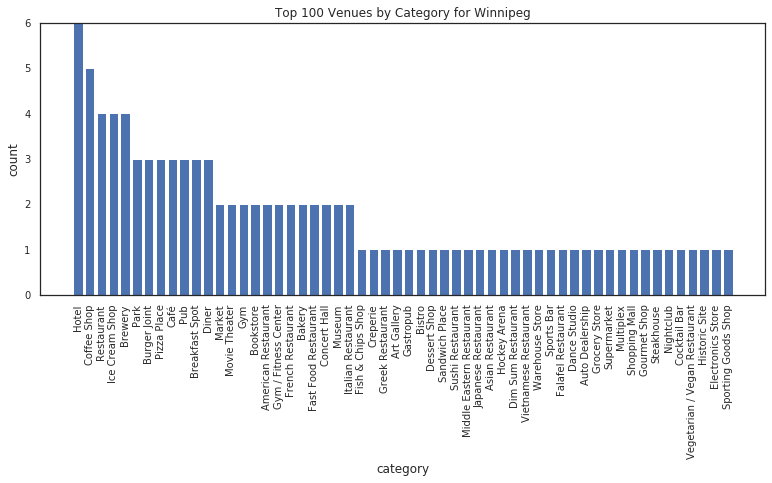

In [169]:
# Let us do a bar chart for Toronto venues
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(13,5))
plt.bar(W_venues['index'], W_venues['categories'], color = 'b')
plt.title('Top 100 Venues by Category for Winnipeg')
plt.ylim([0,6])
plt.yticks(fontsize=10)
plt.ylabel('count', fontsize=12)
plt.xticks(W_venues['index'], fontsize=10, rotation=90)
plt.xlabel('category', fontsize=12)
plt.show()

In [170]:
# Make a Pareto table of categories
# Create columns with comulatve sums in order to create a Pareto chart for Toronto venues
W_venues['CUMSUM'] = W_venues['categories'].cumsum()
W_venues['CUMSUM_PERC'] = 100*W_venues['CUMSUM']/W_venues['categories'].sum()
W_venues.sort_values(by=['categories','index'], ascending=False, inplace=True)
W_venues.head()

index  categories  CUMSUM  CUMSUM_PERC
0           Hotel           6       6          6.0
1     Coffee Shop           5      11         11.0
2      Restaurant           4      15         15.0
3  Ice Cream Shop           4      19         19.0
4         Brewery           4      23         23.0

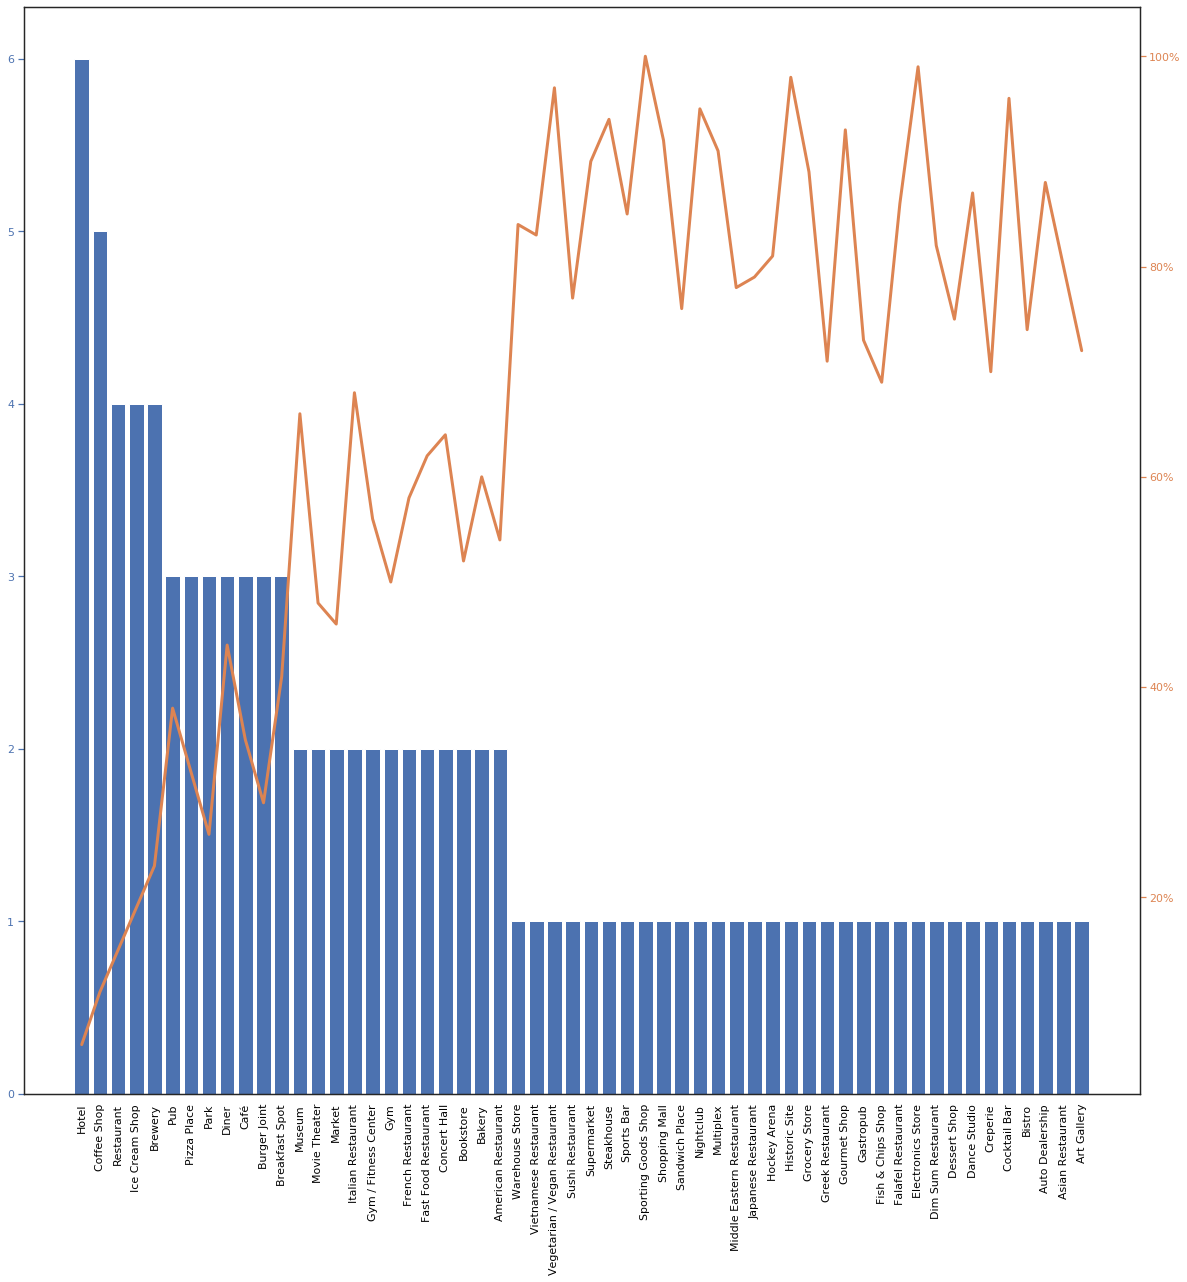

In [171]:
# Make a Pareto Chart plot for Toronto Top 100 venues
from matplotlib.ticker import PercentFormatter
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(W_venues['index'], W_venues['categories'], color="C0")
ax2 = ax.twinx()
ax2.plot(W_venues['index'], W_venues['CUMSUM_PERC'], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="black", rotation = 90)
plt.show()

In [172]:
# Let us group Toronto venues by names
W_venues=nearby_venues_W['name'].value_counts().reset_index()
W_venues.head()

index  name
0                      Chapters     1
1                    Mere Hotel     1
2                Safeway Canada     1
3                 Kildonan Park     1
4  McNally Robinson Booksellers     1

In [173]:
# create map of Toronto using latitude and longitude values with the Top 100 venues
map_Winn = folium.Map(location=[latitude_W, longitude_W], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues_W['lat'], nearby_venues_W['lng'], nearby_venues_W['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Winn)
    folium.Circle(
    [latitude_W, longitude_W],
    radius=10000,
    color='red',
    fill=False,
    parse_html=False).add_to(map_Winn)  
    
map_Winn

In [174]:
# Compare distances from center in Toronto
W_Dist=nearby_venues_W[['distance','lat','lng']]
W_Dist['distance'].describe()

count     100.000000
mean     3164.370000
std      2179.229646
min        69.000000
25%      1068.250000
50%      3115.000000
75%      4818.250000
max      8173.000000
Name: distance, dtype: float64

In [175]:
#Iterate through rows to find long, lat and then compare to the Quad long, lat above to assign to a quadrant
W_Dist.loc[(W_Dist['lat'] > latitude_W) & (W_Dist['lng'] > longitude_W), 'Quadrant'] = 'Q1'
W_Dist.loc[(W_Dist['lat'] > latitude_W) & (W_Dist['lng'] < longitude_W), 'Quadrant'] = 'Q2'
W_Dist.loc[(W_Dist['lat'] < latitude_W) & (W_Dist['lng'] < longitude_W), 'Quadrant'] = 'Q3'
W_Dist.loc[(W_Dist['lat'] < latitude_W) & (W_Dist['lng'] > longitude_W), 'Quadrant'] = 'Q4'                                               
W_Dist.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


distance        lat        lng Quadrant
0       361  49.898367 -97.140918       Q2
1       442  49.899214 -97.140784       Q2
2       453  49.899057 -97.141629       Q2
3       412  49.894161 -97.143796       Q3
4       463  49.899692 -97.138123       Q1

In [176]:
# Now I want to count by quadrants
W_D=W_Dist['Quadrant'].value_counts().reset_index()
W_D.sort_values(by=['index'], ascending=True, inplace=True)
W_D.head()

index  Quadrant
3    Q1        11
2    Q2        12
0    Q3        55
1    Q4        22

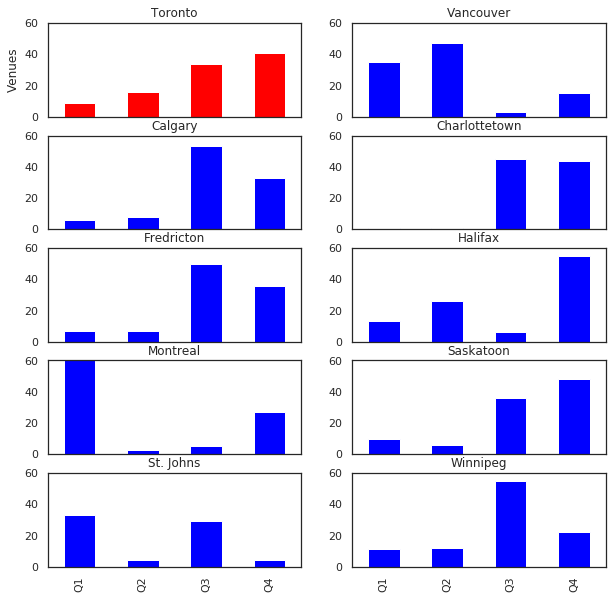

In [177]:
# Let us quickly explore how the precipitation data and weather data look like for  all
# Precipitation

import matplotlib.pyplot as plt
fig=plt.figure()

ax0 = fig.add_subplot(5, 2, 1)
ax1 = fig.add_subplot(5, 2, 2) 
ax2 = fig.add_subplot(5,2,3)
ax3 = fig.add_subplot(5,2,4)
ax4 = fig.add_subplot(5,2,5)
ax5 = fig.add_subplot(5,2,6)
ax6 = fig.add_subplot(5,2,7)
ax7 = fig.add_subplot(5,2,8)
ax8 = fig.add_subplot(5,2,9)
ax9 = fig.add_subplot(5,2,10)

# Subplot 1
Toronto_D['Quadrant'].plot(kind='bar', color = 'red', figsize=(10, 10), ax=ax0) # add to subplot 1
ax0.set_title('Toronto')
ax0.set_ylabel('Venues')
ax0.set_ylim(0,60)
ax0.axes.get_xaxis().set_visible(False)

# Subplot 2
Vancouver_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax1) # add to subplot 2
ax1.set_title ('Vancouver')
ax1.set_ylim(0,60)
ax1.axes.get_xaxis().set_visible(False)

# Subplot 3
Calgary_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax2) # add to subplot 2
ax2.set_title ('Calgary')
ax2.set_ylim(0,60)
ax2.axes.get_xaxis().set_visible(False)

# Subplot 3
Charl_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax3) # add to subplot 2
ax3.set_title ('Charlottetown')
ax3.set_ylim(0,60)
ax3.axes.get_xaxis().set_visible(False)

# Subplot 3
Fred_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax4) # add to subplot 2
ax4.set_title ('Fredricton')
ax4.set_ylim(0,60)
ax4.axes.get_xaxis().set_visible(False)

# Subplot 3
Halifax_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax5) # add to subplot 2
ax5.set_title ('Halifax')
ax5.set_ylim(0,60)
ax5.axes.get_xaxis().set_visible(False)

# Subplot 3
Mon_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax6) # add to subplot 2
ax6.set_title ('Montreal')
ax6.set_ylim(0,60)
ax6.axes.get_xaxis().set_visible(False)

# Subplot 3
SAS_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax7) # add to subplot 2
ax7.set_title ('Saskatoon')
ax7.set_ylim(0,60)
ax7.axes.get_xaxis().set_visible(False)

# Subplot 3
Sj_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax8) # add to subplot 2
ax8.set_title ('St. Johns')
ax8.set_ylim(0,60)
ax8.set_xticklabels(list(Sj_D['index']))

# Subplot 3
W_D['Quadrant'].plot(kind='bar', color='blue', figsize=(10, 10), ax=ax9) # add to subplot 2
ax9.set_title ('Winnipeg')
ax9.set_ylim(0,60)
ax9.set_xticklabels(list(W_D['index']))

plt.show()

## E) K-Means

In [178]:
#Try to cluster venues, let us find the number of unique venues in Toronto
print('There are {} uniques categories.'.format(len(nearby_venues_T['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_V['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_C['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_Ch['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_F['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_H['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_M['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_S['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_Sj['categories'].unique())))
print('There are {} uniques categories.'.format(len(nearby_venues_W['categories'].unique())))

There are 63 uniques categories.
There are 60 uniques categories.
There are 53 uniques categories.
There are 49 uniques categories.
There are 52 uniques categories.
There are 57 uniques categories.
There are 58 uniques categories.
There are 61 uniques categories.
There are 40 uniques categories.
There are 56 uniques categories.


In [179]:
# one hot encoding
Tor_onehot = pd.get_dummies(nearby_venues_T[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tor_onehot['City'] = 'Toronto'
Tor_grouped = Tor_onehot.groupby('City').mean().reset_index()
Tor_grouped

City  American Restaurant  Aquarium  Art Gallery  Arts & Crafts Store  \
0  Toronto                 0.01      0.01         0.02                 0.01   

   Bakery   Bar  Beer Bar  Brewery  Butcher  Café  Clothing Store  \
0    0.03  0.01      0.01     0.01     0.01  0.05            0.01   

   Cocktail Bar  Coffee Shop  Comedy Club  Concert Hall  Cosmetics Shop  \
0          0.01         0.05         0.01          0.03            0.01   

   Dance Studio  Dessert Shop  Diner  Farmers Market  Food Truck  \
0          0.01          0.01   0.02            0.03        0.01   

   French Restaurant  Garden  Gift Shop   Gym  Hostel  Hotel  \
0               0.02    0.01       0.01  0.03    0.01   0.04   

   Italian Restaurant  Japanese Restaurant  Jewelry Store  Lake  \
0                0.03                 0.03           0.01  0.01   

   Mediterranean Restaurant  Mexican Restaurant  Middle Eastern Restaurant  \
0                      0.01                0.02                       0.01   

   Monument / Landmark  Movie Theater  Museum  Neighborhood  Organic Grocery  \
0                 0.01           0.01    0.02          0.01             0.01   

   Park  Performing Arts Venue  Pizza Place  Plaza  Ramen Restaurant  \
0  0.03                   0.01         0.01   0.01              0.01   

   Record Shop  Restaurant  Salad Place  Sandwich Place  Scenic Lookout  \
0         0.01        0.03         0.01            0.03            0.01   

   Seafood Restaurant  Skating Rink   Spa  Speakeasy  Sporting Goods Shop  \
0                0.01          0.01  0.01       0.01                 0.02   

   Steakhouse  Supermarket  Tapas Restaurant  Thai Restaurant  Theater  \
0        0.01         0.01              0.01             0.01     0.02   

   Theme Restaurant  Train Station  Vegetarian / Vegan Restaurant  Yoga Studio  
0              0.01           0.01                           0.01         0.02

In [180]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [181]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Tor = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Tor['City'] = Tor_grouped['City']

for ind in np.arange(Tor_grouped.shape[0]):
    neighborhoods_venues_sorted_Tor.iloc[ind, 1:] = return_most_common_venues(Tor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Tor.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Toronto           Coffee Shop                  Café                 Hotel   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0    Italian Restaurant   Japanese Restaurant                   Gym   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                Bakery        Farmers Market                  Park   

  10th Most Common Venue  
0           Concert Hall

In [182]:
# one hot encoding
Van_onehot = pd.get_dummies(nearby_venues_V[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Van_onehot['City'] = 'Vancouver'
Van_grouped = Van_onehot.groupby('City').mean().reset_index()
Van_grouped

City  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  Beach  \
0  Vancouver              0.01       0.01        0.01    0.06   0.01   

   Belgian Restaurant  Boxing Gym  Breakfast Spot  Brewery  Café  Cheese Shop  \
0                0.01        0.01            0.01     0.02  0.04         0.01   

   Chinese Restaurant  Clothing Store  Cocktail Bar  Coffee Shop  \
0                0.01            0.01          0.01         0.07   

   Concert Hall  Cosmetics Shop  Deli / Bodega  Dessert Shop  Dog Run  \
0          0.02            0.01           0.01          0.03     0.01   

   French Restaurant  Furniture / Home Store  Garden  German Restaurant  \
0               0.01                    0.01    0.02               0.01   

   Grocery Store   Gym  Gym / Fitness Center  Gym Pool  Hockey Arena  Hotel  \
0           0.01  0.02                  0.01      0.01          0.01   0.04   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0            0.04               0.01                0.02                 0.01   

   Juice Bar  Liquor Store  Lounge  Market  Mexican Restaurant  \
0       0.01          0.01    0.01    0.01                0.01   

   Middle Eastern Restaurant  Outdoor Sculpture  Park  Pizza Place  \
0                       0.02               0.01  0.05         0.01   

   Restaurant  Sandwich Place  Seafood Restaurant  Soccer Stadium  Stadium  \
0        0.01            0.02                0.04            0.01     0.01   

   Stationery Store  Steakhouse  Sushi Restaurant  Taco Place  \
0              0.01        0.01              0.01        0.02   

   Thai Restaurant  Theater  Toy / Game Store  Trade School  Trail  \
0             0.01     0.01              0.01          0.01   0.03   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Yoga Studio  
0                           0.02                   0.01         0.01

In [183]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Van = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Van['City'] = Van_grouped['City']

for ind in np.arange(Van_grouped.shape[0]):
    neighborhoods_venues_sorted_Van.iloc[ind, 1:] = return_most_common_venues(Van_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Van.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0  Vancouver           Coffee Shop                Bakery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park                 Hotel    Seafood Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop                  Café                 Trail   

  9th Most Common Venue 10th Most Common Venue  
0          Dessert Shop                 Garden

In [184]:
# one hot encoding
Cal_onehot = pd.get_dummies(nearby_venues_C[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cal_onehot['City'] = 'Calgary'
Cal_grouped = Cal_onehot.groupby('City').mean().reset_index()
Cal_grouped

City  American Restaurant  Asian Restaurant  BBQ Joint  Bakery   Bar  \
0  Calgary                 0.01              0.01       0.01    0.03  0.02   

   Brazilian Restaurant  Breakfast Spot  Brewery  Café  Cocktail Bar  \
0                  0.01            0.02     0.02  0.03          0.02   

   Coffee Shop  Concert Hall  Deli / Bodega  Diner  Exhibit  \
0         0.06          0.01           0.04   0.04     0.02   

   French Restaurant  Gastropub   Gym  Hotel  Hotel Bar  Ice Cream Shop  \
0               0.01       0.02  0.01   0.05       0.01            0.02   

   Italian Restaurant  Japanese Restaurant  Korean Restaurant  \
0                0.03                 0.02               0.01   

   Latin American Restaurant  Liquor Store  Lounge  Mediterranean Restaurant  \
0                       0.01          0.01    0.01                      0.01   

   Mexican Restaurant  Museum  Music Venue  New American Restaurant  \
0                0.01    0.01         0.01                     0.01   

   Noodle House  Park  Performing Arts Venue  Pharmacy  Pizza Place   Pub  \
0          0.02  0.02                   0.02      0.01         0.02  0.02   

   Racetrack  Restaurant  Sandwich Place  Scenic Lookout  Seafood Restaurant  \
0       0.01        0.08            0.01            0.02                0.01   

   Southern / Soul Food Restaurant  Sporting Goods Shop  Steakhouse  \
0                             0.01                 0.01        0.03   

   Sushi Restaurant  Theater  Trail  Vegetarian / Vegan Restaurant  \
0              0.01     0.01   0.02                           0.02   

   Vietnamese Restaurant  Yoga Studio   Zoo  
0                   0.02         0.01  0.01

In [185]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Cal = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Cal['City'] = Cal_grouped['City']

for ind in np.arange(Cal_grouped.shape[0]):
    neighborhoods_venues_sorted_Cal.iloc[ind, 1:] = return_most_common_venues(Cal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Cal.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Calgary            Restaurant           Coffee Shop                 Hotel   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Deli / Bodega                 Diner            Steakhouse   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Café                Bakery    Italian Restaurant   

  10th Most Common Venue  
0                Exhibit

In [186]:
# one hot encoding
Charl_onehot = pd.get_dummies(nearby_venues_Ch[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Charl_onehot['City'] = 'Charlottetown'
Charl_grouped = Charl_onehot.groupby('City').mean().reset_index()
Charl_grouped

City  Airport Lounge  American Restaurant  Art Gallery  \
0  Charlottetown        0.010989             0.021978     0.010989   

   Arts & Crafts Store  Asian Restaurant  BBQ Joint      Bank       Bar  \
0             0.010989          0.010989   0.010989  0.010989  0.010989   

   Big Box Store  Bookstore  Breakfast Spot   Brewery  Burger Joint      Café  \
0       0.010989   0.010989        0.010989  0.021978      0.010989  0.021978   

   Clothing Store  Coffee Shop  Deli / Bodega  Department Store     Diner  \
0        0.010989     0.142857       0.010989          0.010989  0.021978   

   Electronics Store  Farmers Market  Fast Food Restaurant  Gas Station  \
0           0.010989        0.021978              0.043956     0.043956   

   Gastropub  Grocery Store     Hotel  Ice Cream Shop  Italian Restaurant  \
0   0.021978       0.021978  0.021978        0.043956            0.010989   

   Jewelry Store  Liquor Store     Motel  Movie Theater  Music Store  \
0       0.010989      0.010989  0.010989       0.010989     0.010989   

   Paper / Office Supplies Store      Park  Performing Arts Venue  Pet Store  \
0                       0.010989  0.010989               0.010989   0.010989   

   Pharmacy  Pizza Place       Pub  Restaurant  Sandwich Place  \
0  0.010989     0.021978  0.032967    0.043956        0.032967   

   Seafood Restaurant  Sporting Goods Shop  Steakhouse  Sushi Restaurant  \
0            0.043956             0.010989    0.010989          0.021978   

   Tea Room  Toy / Game Store  Vegetarian / Vegan Restaurant  
0  0.021978          0.010989                       0.010989

In [187]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Charl = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Charl['City'] = Charl_grouped['City']

for ind in np.arange(Charl_grouped.shape[0]):
    neighborhoods_venues_sorted_Charl.iloc[ind, 1:] = return_most_common_venues(Charl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Charl.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0  Charlottetown           Coffee Shop  Fast Food Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Gas Station    Seafood Restaurant            Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop        Sandwich Place                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0         Grocery Store                Brewery

In [188]:
# one hot encoding
Fred_onehot = pd.get_dummies(nearby_venues_F[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Fred_onehot['City'] = 'Fredricton'
Fred_grouped = Fred_onehot.groupby('City').mean().reset_index()
Fred_grouped

City  American Restaurant  Art Gallery  Art Museum  Bank   Bar  \
0  Fredricton                 0.01         0.01        0.01  0.02  0.04   

   Basketball Court  Beer Store  Big Box Store  Bookstore  Breakfast Spot  \
0              0.01        0.01           0.01       0.01            0.02   

   Brewery  Café  Candy Store  Coffee Shop  Cosmetics Shop  Diner  \
0     0.01  0.03         0.01          0.1            0.01   0.01   

   Discount Store  Electronics Store  Farmers Market  Fast Food Restaurant  \
0            0.01               0.01            0.02                  0.02   

   Food & Drink Shop  Furniture / Home Store  Gas Station  Gastropub  \
0               0.01                    0.01         0.02       0.01   

   Greek Restaurant  Grocery Store   Gym  Hobby Shop  Hockey Arena  Hotel  \
0              0.01           0.07  0.03        0.01          0.02   0.03   

   Italian Restaurant  Juice Bar  Liquor Store  Mexican Restaurant  \
0                0.01       0.01          0.02                0.01   

   Paper / Office Supplies Store  Park  Performing Arts Venue  Pet Store  \
0                           0.01  0.02                   0.01       0.01   

   Pharmacy  Pizza Place   Pub  Racetrack  Restaurant  Sandwich Place  \
0      0.01         0.04  0.07       0.01        0.08            0.01   

   Seafood Restaurant  Sporting Goods Shop  Steakhouse  Supermarket  \
0                0.01                 0.01        0.01         0.01   

   Sushi Restaurant  Thai Restaurant  Toy / Game Store  Warehouse Store  
0              0.01             0.01              0.01             0.01

In [189]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Fred = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Fred['City'] = Fred_grouped['City']

for ind in np.arange(Fred_grouped.shape[0]):
    neighborhoods_venues_sorted_Fred.iloc[ind, 1:] = return_most_common_venues(Fred_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Fred.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0  Fredricton           Coffee Shop            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Grocery Store                   Pub                   Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place                   Gym                 Hotel   

  9th Most Common Venue 10th Most Common Venue  
0                  Café           Liquor Store

In [190]:
# one hot encoding
Hali_onehot = pd.get_dummies(nearby_venues_H[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hali_onehot['City'] = 'Halifax'
Hali_grouped = Hali_onehot.groupby('City').mean().reset_index()
Hali_grouped

City  BBQ Joint  Bakery   Bar  Bookstore  Breakfast Spot  Brewery  \
0  Halifax       0.01    0.02  0.01       0.02            0.03     0.03   

   Burger Joint  Burrito Place  Café  Candy Store  Clothing Store  \
0          0.03           0.02  0.01         0.01            0.02   

   Cocktail Bar  Coffee Shop  Comfort Food Restaurant  Cosmetics Shop  \
0          0.01         0.07                     0.01            0.01   

   Dessert Shop  Diner  Electronics Store  Event Space  Farmers Market  \
0          0.01   0.01               0.01         0.01            0.01   

   French Restaurant  Garden  Gastropub  Gourmet Shop  Grocery Store   Gym  \
0               0.01    0.01       0.02          0.01           0.01  0.01   

   Gym / Fitness Center  Historic Site  History Museum  Hotel  \
0                  0.01           0.01            0.01   0.04   

   Italian Restaurant  Japanese Restaurant  Lingerie Store  \
0                0.04                 0.01            0.01   

   Middle Eastern Restaurant  Movie Theater  Museum  Music Store  Music Venue  \
0                       0.01           0.01    0.01         0.01         0.01   

   New American Restaurant  Park  Pizza Place  Plaza   Pub  Restaurant  \
0                     0.01  0.02         0.04   0.01  0.04        0.07   

   Rock Climbing Spot  Seafood Restaurant  Shopping Mall  Skating Rink  \
0                0.01                0.03           0.02          0.01   

   Steakhouse  Sushi Restaurant  Thai Restaurant  Theater  Turkish Restaurant  \
0        0.01              0.02             0.01     0.01                0.02   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Waterfront  Wine Shop  
0                           0.03                   0.01        0.01       0.01

In [191]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Hali = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Hali['City'] = Hali_grouped['City']

for ind in np.arange(Hali_grouped.shape[0]):
    neighborhoods_venues_sorted_Hali.iloc[ind, 1:] = return_most_common_venues(Hali_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Hali.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Halifax           Coffee Shop            Restaurant                 Hotel   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place                   Pub    Italian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0               Brewery    Seafood Restaurant          Burger Joint   

  10th Most Common Venue  
0         Breakfast Spot

In [192]:
# one hot encoding
Mon_onehot = pd.get_dummies(nearby_venues_M[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Mon_onehot['City'] = 'Montreal'
Mon_grouped = Mon_onehot.groupby('City').mean().reset_index()
Mon_grouped

City  Art Museum  BBQ Joint  Bagel Shop  Bakery  Beer Bar  Bookstore  \
0  Montreal        0.01       0.01        0.02    0.05      0.01       0.01   

   Burger Joint  Café  Canal  Church  Clothing Store  Cocktail Bar  \
0          0.01  0.12   0.01    0.01            0.01          0.01   

   Coffee Shop  College Gym  Concert Hall  Deli / Bodega  Dessert Shop  \
0         0.02         0.01          0.02           0.01          0.01   

   Donut Shop  Event Space  French Restaurant  Furniture / Home Store  \
0        0.01         0.01               0.04                    0.01   

   Gastropub  Gourmet Shop  Grocery Store  Historic Site  Hockey Arena  Hotel  \
0       0.02          0.02           0.01           0.01          0.01   0.03   

   Ice Cream Shop  Italian Restaurant  Japanese Restaurant  Liquor Store  \
0            0.01                0.01                 0.03          0.01   

   Lounge  Malay Restaurant  Market  Massage Studio  Mediterranean Restaurant  \
0    0.01              0.01    0.01            0.01                      0.01   

   Middle Eastern Restaurant  Museum  Paper / Office Supplies Store  Park  \
0                       0.02    0.01                           0.01  0.04   

   Pastry Shop  Performing Arts Venue  Pizza Place  Plaza  \
0         0.01                   0.01         0.02   0.01   

   Portuguese Restaurant  Restaurant  Salad Place  Scenic Lookout  \
0                   0.02        0.04         0.02            0.01   

   Seafood Restaurant  Smoke Shop   Spa  Steakhouse  Supermarket  Tea Room  \
0                0.01        0.01  0.01        0.01         0.01      0.02   

   Theater  Vegetarian / Vegan Restaurant  Wine Bar  Yoga Studio  
0     0.01                           0.03      0.02         0.02

In [193]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Mon = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Mon['City'] = Mon_grouped['City']

for ind in np.arange(Mon_grouped.shape[0]):
    neighborhoods_venues_sorted_Mon.iloc[ind, 1:] = return_most_common_venues(Mon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Mon.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Montreal                  Café                Bakery     French Restaurant   

  4th Most Common Venue 5th Most Common Venue          6th Most Common Venue  \
0            Restaurant                  Park  Vegetarian / Vegan Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                 Hotel   Japanese Restaurant           Yoga Studio   

  10th Most Common Venue  
0            Pizza Place

In [194]:
# one hot encoding
SAS_onehot = pd.get_dummies(nearby_venues_S[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SAS_onehot['City'] = 'Saskatoon'
SAS_grouped = SAS_onehot.groupby('City').mean().reset_index()
SAS_grouped

City  American Restaurant  Asian Restaurant  Bakery   Bar  Bookstore  \
0  Saskatoon                 0.03              0.03    0.04  0.01       0.02   

   Brazilian Restaurant  Breakfast Spot  Brewery  Burger Joint  Café  \
0                  0.01            0.03     0.01          0.01  0.05   

   Cajun / Creole Restaurant  Camera Store  Caribbean Restaurant  Cheese Shop  \
0                       0.01          0.01                  0.01         0.01   

   Chinese Restaurant  Coffee Shop  Comedy Club  Creperie  Cupcake Shop  \
0                0.01         0.04         0.01      0.01          0.01   

   Dim Sum Restaurant  Diner  Farmers Market  Food Court  French Restaurant  \
0                0.01   0.01            0.01        0.01               0.01   

   Frozen Yogurt Shop  Gastropub  Gift Shop  Gluten-free Restaurant  \
0                0.01       0.01       0.01                    0.02   

   Golf Course  Greek Restaurant  Grocery Store   Gym  Hockey Arena  Hotel  \
0         0.01              0.01           0.01  0.02          0.01   0.06   

   Ice Cream Shop  Indian Restaurant  Indie Movie Theater  Italian Restaurant  \
0            0.01               0.01                 0.01                0.02   

   Juice Bar  Latin American Restaurant  Lounge  Mexican Restaurant  \
0       0.01                       0.01    0.01                0.02   

   Movie Theater  Museum  Music Venue  New American Restaurant  Pizza Place  \
0           0.01    0.01         0.01                     0.01         0.03   

   Pool   Pub  Restaurant  Sandwich Place  Scenic Lookout  Shoe Store  \
0  0.01  0.04        0.06            0.01            0.01        0.01   

   Sporting Goods Shop  Steakhouse  Supermarket  Thai Restaurant  Theater  \
0                 0.01        0.03         0.01             0.01     0.01   

   Trail  Vietnamese Restaurant   Zoo  
0   0.01                   0.02  0.01

In [195]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_SAS = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_SAS['City'] = SAS_grouped['City']

for ind in np.arange(SAS_grouped.shape[0]):
    neighborhoods_venues_sorted_SAS.iloc[ind, 1:] = return_most_common_venues(SAS_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_SAS.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0  Saskatoon            Restaurant                 Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Café           Coffee Shop                Bakery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Pub        Breakfast Spot           Pizza Place   

  9th Most Common Venue 10th Most Common Venue  
0   American Restaurant             Steakhouse

In [196]:
# one hot encoding
Sj_onehot = pd.get_dummies(nearby_venues_Sj[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Sj_onehot['City'] = 'St Johns'
Sj_grouped = Sj_onehot.groupby('City').mean().reset_index()
Sj_grouped

City    Bakery      Bank       Bar  Bookstore  Breakfast Spot  \
0  St Johns  0.042857  0.014286  0.014286   0.014286        0.014286   

    Brewery      Café  Coffee Shop  Convenience Store  Cosmetics Shop  \
0  0.014286  0.028571     0.114286           0.014286        0.014286   

   Dive Bar      Farm  Fast Food Restaurant  Frozen Yogurt Shop  Gastropub  \
0  0.014286  0.014286              0.042857            0.014286   0.042857   

   Grocery Store       Gym  Hardware Store  Historic Site     Hotel  \
0       0.014286  0.014286        0.014286       0.014286  0.028571   

   Ice Cream Shop  Juice Bar  Mac & Cheese Joint    Museum  \
0        0.028571   0.014286            0.014286  0.014286   

   Paper / Office Supplies Store      Park  Pizza Place       Pub  \
0                       0.014286  0.028571     0.028571  0.042857   

   Record Shop  Restaurant  Sandwich Place  Scenic Lookout  \
0     0.014286         0.1        0.028571        0.042857   

   Seafood Restaurant  Shop & Service  Soccer Field  Sporting Goods Shop  \
0            0.028571        0.014286      0.014286             0.014286   

   Sushi Restaurant  Tapas Restaurant  Tea Room  Wings Joint  
0          0.014286          0.014286  0.014286     0.014286

In [197]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Sj = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Sj['City'] = Sj_grouped['City']

for ind in np.arange(Sj_grouped.shape[0]):
    neighborhoods_venues_sorted_Sj.iloc[ind, 1:] = return_most_common_venues(Sj_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Sj.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  St Johns           Coffee Shop            Restaurant                Bakery   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   Pub  Fast Food Restaurant             Gastropub   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Scenic Lookout                  Café        Ice Cream Shop   

  10th Most Common Venue  
0                   Park

In [198]:
# one hot encoding
Winn_onehot = pd.get_dummies(nearby_venues_W[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Winn_onehot['City'] = 'Winnipeg'
Winn_grouped = Winn_onehot.groupby('City').mean().reset_index()
Winn_grouped

City  American Restaurant  Art Gallery  Asian Restaurant  \
0  Winnipeg                 0.02         0.01              0.01   

   Auto Dealership  Bakery  Bistro  Bookstore  Breakfast Spot  Brewery  \
0             0.01    0.02    0.01       0.02            0.03     0.04   

   Burger Joint  Café  Cocktail Bar  Coffee Shop  Concert Hall  Creperie  \
0          0.03  0.03          0.01         0.05          0.02      0.01   

   Dance Studio  Dessert Shop  Dim Sum Restaurant  Diner  Electronics Store  \
0          0.01          0.01                0.01   0.03               0.01   

   Falafel Restaurant  Fast Food Restaurant  Fish & Chips Shop  \
0                0.01                  0.02               0.01   

   French Restaurant  Gastropub  Gourmet Shop  Greek Restaurant  \
0               0.02       0.01          0.01              0.01   

   Grocery Store   Gym  Gym / Fitness Center  Historic Site  Hockey Arena  \
0           0.01  0.02                  0.02           0.01          0.01   

   Hotel  Ice Cream Shop  Italian Restaurant  Japanese Restaurant  Market  \
0   0.06            0.04                0.02                 0.01    0.02   

   Middle Eastern Restaurant  Movie Theater  Multiplex  Museum  Nightclub  \
0                       0.01           0.02       0.01    0.02       0.01   

   Park  Pizza Place   Pub  Restaurant  Sandwich Place  Shopping Mall  \
0  0.03         0.03  0.03        0.04            0.01           0.01   

   Sporting Goods Shop  Sports Bar  Steakhouse  Supermarket  Sushi Restaurant  \
0                 0.01        0.01        0.01         0.01              0.01   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Warehouse Store  
0                           0.01                   0.01             0.01

In [199]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Winn = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Winn['City'] = Winn_grouped['City']

for ind in np.arange(Winn_grouped.shape[0]):
    neighborhoods_venues_sorted_Winn.iloc[ind, 1:] = return_most_common_venues(Winn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Winn.head()

City 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Winnipeg                 Hotel           Coffee Shop        Ice Cream Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Restaurant               Brewery        Breakfast Spot   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                 Diner                   Pub           Pizza Place   

  10th Most Common Venue  
0                   Park

In [200]:
#Merge Vancouver and Toronto @ 10 Most Common Venues
result = pd.concat([Tor_grouped, Van_grouped, Cal_grouped, Charl_grouped, Fred_grouped, Hali_grouped, Mon_grouped, SAS_grouped, Sj_grouped, Winn_grouped], axis=0, sort=False)
result

City  American Restaurant  Aquarium  Art Gallery  \
0        Toronto             0.010000      0.01     0.020000   
0      Vancouver                  NaN       NaN          NaN   
0        Calgary             0.010000       NaN          NaN   
0  Charlottetown             0.021978       NaN     0.010989   
0     Fredricton             0.010000       NaN     0.010000   
0        Halifax                  NaN       NaN          NaN   
0       Montreal                  NaN       NaN          NaN   
0      Saskatoon             0.030000       NaN          NaN   
0       St Johns                  NaN       NaN          NaN   
0       Winnipeg             0.020000       NaN     0.010000   

   Arts & Crafts Store    Bakery       Bar  Beer Bar   Brewery  Butcher  \
0             0.010000  0.030000  0.010000      0.01  0.010000     0.01   
0                  NaN  0.060000       NaN       NaN  0.020000      NaN   
0                  NaN  0.030000  0.020000       NaN  0.020000      NaN   
0             0.010989       NaN  0.010989       NaN  0.021978      NaN   
0                  NaN       NaN  0.040000       NaN  0.010000      NaN   
0                  NaN  0.020000  0.010000       NaN  0.030000      NaN   
0                  NaN  0.050000       NaN      0.01       NaN      NaN   
0                  NaN  0.040000  0.010000       NaN  0.010000      NaN   
0                  NaN  0.042857  0.014286       NaN  0.014286      NaN   
0                  NaN  0.020000       NaN       NaN  0.040000      NaN   

       Café  Clothing Store  Cocktail Bar  Coffee Shop  Comedy Club  \
0  0.050000        0.010000          0.01     0.050000         0.01   
0  0.040000        0.010000          0.01     0.070000          NaN   
0  0.030000             NaN          0.02     0.060000          NaN   
0  0.021978        0.010989           NaN     0.142857          NaN   
0  0.030000             NaN           NaN     0.100000          NaN   
0  0.010000        0.020000          0.01     0.070000          NaN   
0  0.120000        0.010000          0.01     0.020000          NaN   
0  0.050000             NaN           NaN     0.040000         0.01   
0  0.028571             NaN           NaN     0.114286          NaN   
0  0.030000             NaN          0.01     0.050000          NaN   

   Concert Hall  Cosmetics Shop  Dance Studio  Dessert Shop     Diner  \
0          0.03        0.010000          0.01          0.01  0.020000   
0          0.02        0.010000           NaN          0.03       NaN   
0          0.01             NaN           NaN           NaN  0.040000   
0           NaN             NaN           NaN           NaN  0.021978   
0           NaN        0.010000           NaN           NaN  0.010000   
0           NaN        0.010000           NaN          0.01  0.010000   
0          0.02             NaN           NaN          0.01       NaN   
0           NaN             NaN           NaN           NaN  0.010000   
0           NaN        0.014286           NaN           NaN       NaN   
0          0.02             NaN          0.01          0.01  0.030000   

   Farmers Market  Food Truck  French Restaurant  Garden  Gift Shop       Gym  \
0        0.030000        0.01               0.02    0.01       0.01  0.030000   
0             NaN         NaN               0.01    0.02        NaN  0.020000   
0             NaN         NaN               0.01     NaN        NaN  0.010000   
0        0.021978         NaN                NaN     NaN        NaN       NaN   
0        0.020000         NaN                NaN     NaN        NaN  0.030000   
0        0.010000         NaN               0.01    0.01        NaN  0.010000   
0             NaN         NaN               0.04     NaN        NaN       NaN   
0        0.010000         NaN               0.01     NaN       0.01  0.020000   
0             NaN         NaN                NaN     NaN        NaN  0.014286   
0             NaN         NaN               0.02     NaN        NaN  0.020000   

   

In [201]:
result = result.fillna(0)
result

City  American Restaurant  Aquarium  Art Gallery  \
0        Toronto             0.010000      0.01     0.020000   
0      Vancouver             0.000000      0.00     0.000000   
0        Calgary             0.010000      0.00     0.000000   
0  Charlottetown             0.021978      0.00     0.010989   
0     Fredricton             0.010000      0.00     0.010000   
0        Halifax             0.000000      0.00     0.000000   
0       Montreal             0.000000      0.00     0.000000   
0      Saskatoon             0.030000      0.00     0.000000   
0       St Johns             0.000000      0.00     0.000000   
0       Winnipeg             0.020000      0.00     0.010000   

   Arts & Crafts Store    Bakery       Bar  Beer Bar   Brewery  Butcher  \
0             0.010000  0.030000  0.010000      0.01  0.010000     0.01   
0             0.000000  0.060000  0.000000      0.00  0.020000     0.00   
0             0.000000  0.030000  0.020000      0.00  0.020000     0.00   
0             0.010989  0.000000  0.010989      0.00  0.021978     0.00   
0             0.000000  0.000000  0.040000      0.00  0.010000     0.00   
0             0.000000  0.020000  0.010000      0.00  0.030000     0.00   
0             0.000000  0.050000  0.000000      0.01  0.000000     0.00   
0             0.000000  0.040000  0.010000      0.00  0.010000     0.00   
0             0.000000  0.042857  0.014286      0.00  0.014286     0.00   
0             0.000000  0.020000  0.000000      0.00  0.040000     0.00   

       Café  Clothing Store  Cocktail Bar  Coffee Shop  Comedy Club  \
0  0.050000        0.010000          0.01     0.050000         0.01   
0  0.040000        0.010000          0.01     0.070000         0.00   
0  0.030000        0.000000          0.02     0.060000         0.00   
0  0.021978        0.010989          0.00     0.142857         0.00   
0  0.030000        0.000000          0.00     0.100000         0.00   
0  0.010000        0.020000          0.01     0.070000         0.00   
0  0.120000        0.010000          0.01     0.020000         0.00   
0  0.050000        0.000000          0.00     0.040000         0.01   
0  0.028571        0.000000          0.00     0.114286         0.00   
0  0.030000        0.000000          0.01     0.050000         0.00   

   Concert Hall  Cosmetics Shop  Dance Studio  Dessert Shop     Diner  \
0          0.03        0.010000          0.01          0.01  0.020000   
0          0.02        0.010000          0.00          0.03  0.000000   
0          0.01        0.000000          0.00          0.00  0.040000   
0          0.00        0.000000          0.00          0.00  0.021978   
0          0.00        0.010000          0.00          0.00  0.010000   
0          0.00        0.010000          0.00          0.01  0.010000   
0          0.02        0.000000          0.00          0.01  0.000000   
0          0.00        0.000000          0.00          0.00  0.010000   
0          0.00        0.014286          0.00          0.00  0.000000   
0          0.02        0.000000          0.01          0.01  0.030000   

   Farmers Market  Food Truck  French Restaurant  Garden  Gift Shop       Gym  \
0        0.030000        0.01               0.02    0.01       0.01  0.030000   
0        0.000000        0.00               0.01    0.02       0.00  0.020000   
0        0.000000        0.00               0.01    0.00       0.00  0.010000   
0        0.021978        0.00               0.00    0.00       0.00  0.000000   
0        0.020000        0.00               0.00    0.00       0.00  0.030000   
0        0.010000        0.00               0.01    0.01       0.00  0.010000   
0        0.000000        0.00               0.04    0.00       0.00  0.000000   
0        0.010000        0.00               0.01    0.00       0.01  0.020000   
0        0.000000        0.00               0.00    0.00       0.00  0.014286   
0        0.000000        0.00               0.02    0.00       0.00  0.020000   

   

In [202]:
# set number of clusters
kclusters = 3

result_cluster = result.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(result_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 0, 0, 2, 1, 2, 0, 2], dtype=int32)

In [210]:
# add clustering labels
result.insert(0, 'Cluster Labels', kmeans.labels_)
result

Cluster Labels           City  American Restaurant  Aquarium  Art Gallery  \
0               1        Toronto             0.010000      0.01     0.020000   
0               1      Vancouver             0.000000      0.00     0.000000   
0               2        Calgary             0.010000      0.00     0.000000   
0               0  Charlottetown             0.021978      0.00     0.010989   
0               0     Fredricton             0.010000      0.00     0.010000   
0               2        Halifax             0.000000      0.00     0.000000   
0               1       Montreal             0.000000      0.00     0.000000   
0               2      Saskatoon             0.030000      0.00     0.000000   
0               0       St Johns             0.000000      0.00     0.000000   
0               2       Winnipeg             0.020000      0.00     0.010000   

   Arts & Crafts Store    Bakery       Bar  Beer Bar   Brewery  Butcher  \
0             0.010000  0.030000  0.010000      0.01  0.010000     0.01   
0             0.000000  0.060000  0.000000      0.00  0.020000     0.00   
0             0.000000  0.030000  0.020000      0.00  0.020000     0.00   
0             0.010989  0.000000  0.010989      0.00  0.021978     0.00   
0             0.000000  0.000000  0.040000      0.00  0.010000     0.00   
0             0.000000  0.020000  0.010000      0.00  0.030000     0.00   
0             0.000000  0.050000  0.000000      0.01  0.000000     0.00   
0             0.000000  0.040000  0.010000      0.00  0.010000     0.00   
0             0.000000  0.042857  0.014286      0.00  0.014286     0.00   
0             0.000000  0.020000  0.000000      0.00  0.040000     0.00   

       Café  Clothing Store  Cocktail Bar  Coffee Shop  Comedy Club  \
0  0.050000        0.010000          0.01     0.050000         0.01   
0  0.040000        0.010000          0.01     0.070000         0.00   
0  0.030000        0.000000          0.02     0.060000         0.00   
0  0.021978        0.010989          0.00     0.142857         0.00   
0  0.030000        0.000000          0.00     0.100000         0.00   
0  0.010000        0.020000          0.01     0.070000         0.00   
0  0.120000        0.010000          0.01     0.020000         0.00   
0  0.050000        0.000000          0.00     0.040000         0.01   
0  0.028571        0.000000          0.00     0.114286         0.00   
0  0.030000        0.000000          0.01     0.050000         0.00   

   Concert Hall  Cosmetics Shop  Dance Studio  Dessert Shop     Diner  \
0          0.03        0.010000          0.01          0.01  0.020000   
0          0.02        0.010000          0.00          0.03  0.000000   
0          0.01        0.000000          0.00          0.00  0.040000   
0          0.00        0.000000          0.00          0.00  0.021978   
0          0.00        0.010000          0.00          0.00  0.010000   
0          0.00        0.010000          0.00          0.01  0.010000   
0          0.02        0.000000          0.00          0.01  0.000000   
0          0.00        0.000000          0.00          0.00  0.010000   
0          0.00        0.014286          0.00          0.00  0.000000   
0          0.02        0.000000          0.01          0.01  0.030000   

   Farmers Market  Food Truck  French Restaurant  Garden  Gift Shop       Gym  \
0        0.030000        0.01               0.02    0.01       0.01  0.030000   
0        0.000000        0.00               0.01    0.02       0.00  0.020000   
0        0.000000        0.00               0.01    0.00       0.00  0.010000   
0        0.021978        0.00               0.00    0.00       0.00  0.000000   
0        0.020000        0.00               0.00    0.00       0.00  0.030000   
0        0.010000        0.00               0.01    0.01       0.00  0.010000   
0        0.000000        0.00               0.04    0.00       0.00  0.000000   
0        0.010000        0.00               0.01    0.00      

In [211]:
#Merge Top 10 Most Common Venues
result_top = pd.concat([neighborhoods_venues_sorted_Tor,neighborhoods_venues_sorted_Van, neighborhoods_venues_sorted_Cal,neighborhoods_venues_sorted_Charl, neighborhoods_venues_sorted_Fred, neighborhoods_venues_sorted_Hali,neighborhoods_venues_sorted_Mon, neighborhoods_venues_sorted_SAS, neighborhoods_venues_sorted_Sj, neighborhoods_venues_sorted_Winn], axis=0, sort=False)
result_top

City 1st Most Common Venue 2nd Most Common Venue  \
0        Toronto           Coffee Shop                  Café   
0      Vancouver           Coffee Shop                Bakery   
0        Calgary            Restaurant           Coffee Shop   
0  Charlottetown           Coffee Shop  Fast Food Restaurant   
0     Fredricton           Coffee Shop            Restaurant   
0        Halifax           Coffee Shop            Restaurant   
0       Montreal                  Café                Bakery   
0      Saskatoon            Restaurant                 Hotel   
0       St Johns           Coffee Shop            Restaurant   
0       Winnipeg                 Hotel           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel    Italian Restaurant   Japanese Restaurant   
0                  Park                 Hotel    Seafood Restaurant   
0                 Hotel         Deli / Bodega                 Diner   
0           Gas Station    Seafood Restaurant            Restaurant   
0         Grocery Store                   Pub                   Bar   
0                 Hotel           Pizza Place                   Pub   
0     French Restaurant            Restaurant                  Park   
0                  Café           Coffee Shop                Bakery   
0                Bakery                   Pub  Fast Food Restaurant   
0        Ice Cream Shop            Restaurant               Brewery   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                            Gym                Bakery        Farmers Market   
0                 Ice Cream Shop                  Café                 Trail   
0                     Steakhouse                  Café                Bakery   
0                 Ice Cream Shop        Sandwich Place                   Pub   
0                    Pizza Place                   Gym                 Hotel   
0             Italian Restaurant               Brewery    Seafood Restaurant   
0  Vegetarian / Vegan Restaurant                 Hotel   Japanese Restaurant   
0                            Pub        Breakfast Spot           Pizza Place   
0                      Gastropub        Scenic Lookout                  Café   
0                 Breakfast Spot                 Diner                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0                  Park           Concert Hall  
0          Dessert Shop                 Garden  
0    Italian Restaurant                Exhibit  
0         Grocery Store                Brewery  
0                  Café           Liquor Store  
0          Burger Joint         Breakfast Spot  
0           Yoga Studio            Pizza Place  
0   American Restaurant             Steakhouse  
0        Ice Cream Shop                   Park  
0           Pizza Place                   Park

In [222]:
# add clustering labels
result_top = result_top.drop(["Cluster Labels","Cluster Labels2"], axis=1)
result_top

City 1st Most Common Venue 2nd Most Common Venue  \
0        Toronto           Coffee Shop                  Café   
0      Vancouver           Coffee Shop                Bakery   
0        Calgary            Restaurant           Coffee Shop   
0  Charlottetown           Coffee Shop  Fast Food Restaurant   
0     Fredricton           Coffee Shop            Restaurant   
0        Halifax           Coffee Shop            Restaurant   
0       Montreal                  Café                Bakery   
0      Saskatoon            Restaurant                 Hotel   
0       St Johns           Coffee Shop            Restaurant   
0       Winnipeg                 Hotel           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel    Italian Restaurant   Japanese Restaurant   
0                  Park                 Hotel    Seafood Restaurant   
0                 Hotel         Deli / Bodega                 Diner   
0           Gas Station    Seafood Restaurant            Restaurant   
0         Grocery Store                   Pub                   Bar   
0                 Hotel           Pizza Place                   Pub   
0     French Restaurant            Restaurant                  Park   
0                  Café           Coffee Shop                Bakery   
0                Bakery                   Pub  Fast Food Restaurant   
0        Ice Cream Shop            Restaurant               Brewery   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                            Gym                Bakery        Farmers Market   
0                 Ice Cream Shop                  Café                 Trail   
0                     Steakhouse                  Café                Bakery   
0                 Ice Cream Shop        Sandwich Place                   Pub   
0                    Pizza Place                   Gym                 Hotel   
0             Italian Restaurant               Brewery    Seafood Restaurant   
0  Vegetarian / Vegan Restaurant                 Hotel   Japanese Restaurant   
0                            Pub        Breakfast Spot           Pizza Place   
0                      Gastropub        Scenic Lookout                  Café   
0                 Breakfast Spot                 Diner                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0                  Park           Concert Hall  
0          Dessert Shop                 Garden  
0    Italian Restaurant                Exhibit  
0         Grocery Store                Brewery  
0                  Café           Liquor Store  
0          Burger Joint         Breakfast Spot  
0           Yoga Studio            Pizza Place  
0   American Restaurant             Steakhouse  
0        Ice Cream Shop                   Park  
0           Pizza Place                   Park

In [223]:
# add clustering labels
result_top.insert(0, 'Cluster Labels', kmeans.labels_)
result_top

Cluster Labels           City 1st Most Common Venue 2nd Most Common Venue  \
0               1        Toronto           Coffee Shop                  Café   
0               1      Vancouver           Coffee Shop                Bakery   
0               2        Calgary            Restaurant           Coffee Shop   
0               0  Charlottetown           Coffee Shop  Fast Food Restaurant   
0               0     Fredricton           Coffee Shop            Restaurant   
0               2        Halifax           Coffee Shop            Restaurant   
0               1       Montreal                  Café                Bakery   
0               2      Saskatoon            Restaurant                 Hotel   
0               0       St Johns           Coffee Shop            Restaurant   
0               2       Winnipeg                 Hotel           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel    Italian Restaurant   Japanese Restaurant   
0                  Park                 Hotel    Seafood Restaurant   
0                 Hotel         Deli / Bodega                 Diner   
0           Gas Station    Seafood Restaurant            Restaurant   
0         Grocery Store                   Pub                   Bar   
0                 Hotel           Pizza Place                   Pub   
0     French Restaurant            Restaurant                  Park   
0                  Café           Coffee Shop                Bakery   
0                Bakery                   Pub  Fast Food Restaurant   
0        Ice Cream Shop            Restaurant               Brewery   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                            Gym                Bakery        Farmers Market   
0                 Ice Cream Shop                  Café                 Trail   
0                     Steakhouse                  Café                Bakery   
0                 Ice Cream Shop        Sandwich Place                   Pub   
0                    Pizza Place                   Gym                 Hotel   
0             Italian Restaurant               Brewery    Seafood Restaurant   
0  Vegetarian / Vegan Restaurant                 Hotel   Japanese Restaurant   
0                            Pub        Breakfast Spot           Pizza Place   
0                      Gastropub        Scenic Lookout                  Café   
0                 Breakfast Spot                 Diner                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0                  Park           Concert Hall  
0          Dessert Shop                 Garden  
0    Italian Restaurant                Exhibit  
0         Grocery Store                Brewery  
0                  Café           Liquor Store  
0          Burger Joint         Breakfast Spot  
0           Yoga Studio            Pizza Place  
0   American Restaurant             Steakhouse  
0        Ice Cream Shop                   Park  
0           Pizza Place                   Park

In [227]:
result_top.loc[result_top['Cluster Labels'] == 0, result_top.columns[[0] + list(range(1, result_top.shape[1]))]]

Cluster Labels           City 1st Most Common Venue 2nd Most Common Venue  \
0               0  Charlottetown           Coffee Shop  Fast Food Restaurant   
0               0     Fredricton           Coffee Shop            Restaurant   
0               0       St Johns           Coffee Shop            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Gas Station    Seafood Restaurant            Restaurant   
0         Grocery Store                   Pub                   Bar   
0                Bakery                   Pub  Fast Food Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop        Sandwich Place                   Pub   
0           Pizza Place                   Gym                 Hotel   
0             Gastropub        Scenic Lookout                  Café   

  9th Most Common Venue 10th Most Common Venue  
0         Grocery Store                Brewery  
0                  Café           Liquor Store  
0        Ice Cream Shop                   Park

In [228]:
result_top.loc[result_top['Cluster Labels'] == 1, result_top.columns[[0] + list(range(1, result_top.shape[1]))]]

Cluster Labels       City 1st Most Common Venue 2nd Most Common Venue  \
0               1    Toronto           Coffee Shop                  Café   
0               1  Vancouver           Coffee Shop                Bakery   
0               1   Montreal                  Café                Bakery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel    Italian Restaurant   Japanese Restaurant   
0                  Park                 Hotel    Seafood Restaurant   
0     French Restaurant            Restaurant                  Park   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                            Gym                Bakery        Farmers Market   
0                 Ice Cream Shop                  Café                 Trail   
0  Vegetarian / Vegan Restaurant                 Hotel   Japanese Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0                  Park           Concert Hall  
0          Dessert Shop                 Garden  
0           Yoga Studio            Pizza Place

In [229]:
result_top.loc[result_top['Cluster Labels'] == 2, result_top.columns[[0] + list(range(1, result_top.shape[1]))]]

Cluster Labels       City 1st Most Common Venue 2nd Most Common Venue  \
0               2    Calgary            Restaurant           Coffee Shop   
0               2    Halifax           Coffee Shop            Restaurant   
0               2  Saskatoon            Restaurant                 Hotel   
0               2   Winnipeg                 Hotel           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel         Deli / Bodega                 Diner   
0                 Hotel           Pizza Place                   Pub   
0                  Café           Coffee Shop                Bakery   
0        Ice Cream Shop            Restaurant               Brewery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Steakhouse                  Café                Bakery   
0    Italian Restaurant               Brewery    Seafood Restaurant   
0                   Pub        Breakfast Spot           Pizza Place   
0        Breakfast Spot                 Diner                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0    Italian Restaurant                Exhibit  
0          Burger Joint         Breakfast Spot  
0   American Restaurant             Steakhouse  
0           Pizza Place                   Park

## The End